In [1]:
import sys
sys.path.insert(0, 'C:/Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data')
import data__, main_, datafactory, data_utils
from importlib import reload
reload(data__)
reload(main_)
reload(datafactory)
reload(data_utils)
from datafactory import DataSet
from data__ import Transform
from main_ import Model
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

In [2]:
#target = "power_consumption_kwh"
target = "thermal_consumption_kwh"

experiment = {}

dset = DataSet(start_date="2022-01-01", target=target, scale_target=False, scale_variables=False, time_features=False, dynamic_price=False, demand_price=0.5, feedin_price=0.5).pipeline()
#dset = dset[["date","i_m1sum",target]]

dset = dset[["date",target]]


t = Transform(dataset=dset, resample="h", target=target, scale_X=True)
data= t.transform()
data

0.07637132957990407 1.272


C:\Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data\datafactory.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.thermal_consumption[idx_temp] = abs(m_diff[m_diff < 0])   # only positive values
C:\Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data\datafactory.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.thermal_consumption[idx_temp] = abs(m_diff[m_diff < 0])   # only positive values


,val_last_day,val_last_week,mean_24h,month,hour,weekday,day_continuous,thermal_consumption_kwh
0,0.000389,-0.000135,0.002338,1,0,5,-1.630831,0.445731
1,0.000389,-0.000135,0.002338,1,1,5,-1.630831,0.174417
2,0.000389,-0.000135,0.002338,1,2,5,-1.630831,0.135657
3,0.000389,-0.000135,0.002338,1,3,5,-1.630831,0.232556
4,0.000389,-0.000135,0.002338,1,4,5,-1.630831,0.465111
...,...,...,...,...,...,...,...,...
5521,-0.141921,-0.198194,0.339395,8,1,4,0.438983,0.116278
5522,-0.170025,-0.142116,0.312142,8,2,4,0.438983,0.174417
5523,-0.141921,-0.226233,0.312142,8,3,4,0.438983,0.116278
5524,-0.170025,-0.226233,0.284889,8,4,4,0.438983,0.096898


In [3]:
from itertools import combinations


features = list(data.columns)
del features[-1]

print(features)

feature_combinations = []
for i in range(len(features)):
    oc = combinations(features, i + 1)
    for c in oc:
        l = list(c)
        l.append(target)
        feature_combinations.append(l)

feature_combinations

['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous']


[['val_last_day', 'thermal_consumption_kwh'],
 ['val_last_week', 'thermal_consumption_kwh'],
 ['mean_24h', 'thermal_consumption_kwh'],
 ['month', 'thermal_consumption_kwh'],
 ['hour', 'thermal_consumption_kwh'],
 ['weekday', 'thermal_consumption_kwh'],
 ['day_continuous', 'thermal_consumption_kwh'],
 ['val_last_day', 'val_last_week', 'thermal_consumption_kwh'],
 ['val_last_day', 'mean_24h', 'thermal_consumption_kwh'],
 ['val_last_day', 'month', 'thermal_consumption_kwh'],
 ['val_last_day', 'hour', 'thermal_consumption_kwh'],
 ['val_last_day', 'weekday', 'thermal_consumption_kwh'],
 ['val_last_day', 'day_continuous', 'thermal_consumption_kwh'],
 ['val_last_week', 'mean_24h', 'thermal_consumption_kwh'],
 ['val_last_week', 'month', 'thermal_consumption_kwh'],
 ['val_last_week', 'hour', 'thermal_consumption_kwh'],
 ['val_last_week', 'weekday', 'thermal_consumption_kwh'],
 ['val_last_week', 'day_continuous', 'thermal_consumption_kwh'],
 ['mean_24h', 'month', 'thermal_consumption_kwh'],
 ['m

In [110]:
model = Model(model="svr", dataset=data, encoding="onehot", scale=True, target=target, test_size=0.05, epochs=200)

      val_last_day  val_last_week  mean_24h  month  hour  weekday  \
0         0.000389      -0.000135  0.002338      1     0        5   
1         0.000389      -0.000135  0.002338      1     1        5   
2         0.000389      -0.000135  0.002338      1     2        5   
3         0.000389      -0.000135  0.002338      1     3        5   
4         0.000389      -0.000135  0.002338      1     4        5   
...            ...            ...       ...    ...   ...      ...   
5521     -0.141921      -0.198194  0.339395      8     1        4   
5522     -0.170025      -0.142116  0.312142      8     2        4   
5523     -0.141921      -0.226233  0.312142      8     3        4   
5524     -0.170025      -0.226233  0.284889      8     4        4   
5525     -0.422960      -0.422506  0.257637      8     5        4   

      day_continuous  thermal_consumption_kwh  
0          -1.630831                 0.445731  
1          -1.630831                 0.174417  
2          -1.630831       

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.1968086709077223
y_pred mean and std:
0.2354431261606685 0.11270677907751955


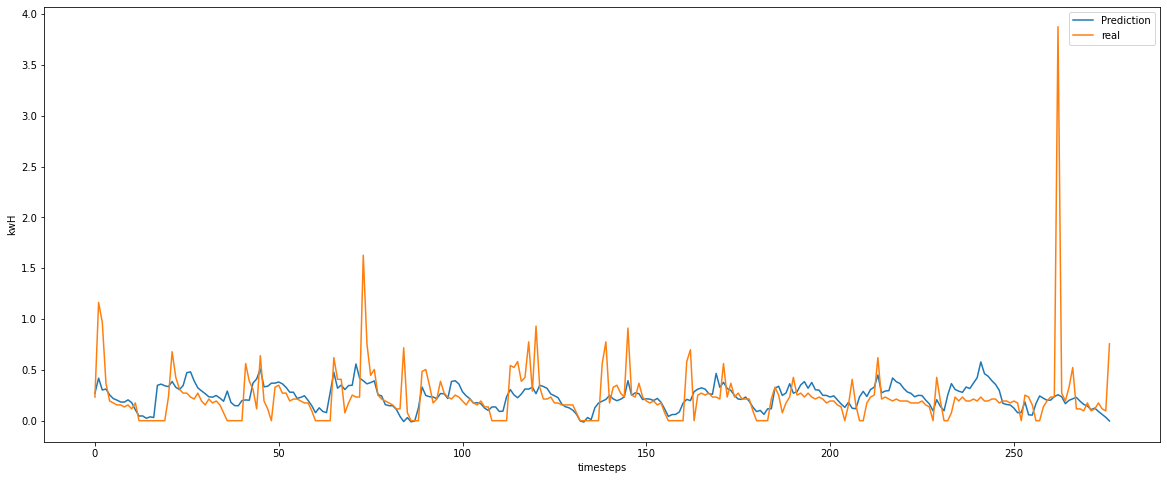

{'mae': 0.13606501290182005,
 'mse': 0.08356361873495788,
 'mape': 115236830785466.2,
 'r2': 0.07075568110084152}

In [111]:
model.results(plot=True)

In [112]:
from sklearn.model_selection import ParameterGrid
import pandas as pd

# params_grid = {
#   "n_hidden1": [500],
#   "n_hidden2": [50],
#   "encoding": ["cyclical", "onehot", None],
#   "activation1": ["sigmoid",  "selu", "relu"],
#   "activation2": ["sigmoid",  "selu" , "relu"],
#   "lr": [0.001, 0.0001]
# }

params_grid = {
  "n_hidden1": [500],
  "n_hidden2": [50],
  "features": feature_combinations,
  "encoding": ["onehot"],
  "activation1": ["relu"],
  "activation2": ["relu"],
  "lr": [0.001]
}


grid = ParameterGrid(params_grid) 

In [113]:
print(len(grid))
res = []
for p in grid:
    print(p)
    model = Model(model="nn", dataset=data[p["features"]], encoding=p["encoding"], scale=True, target=target, test_size=0.05, epochs=100, verbose=0, nn_params=p )
    metrics = model.results(plot=False)
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
experiment.update({"df_nn": df})
df.sort_values(by='mse', ascending=True)

127
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
      val_last_day  thermal_consumption_kwh
0         0.000389                 0.445731
1         0.000389                 0.174417
2         0.000389                 0.135657
3         0.000389                 0.232556
4         0.000389                 0.465111
...            ...                      ...
5521     -0.141921                 0.116278
5522     -0.170025                 0.174417
5523     -0.141921                 0.116278
5524     -0.170025                 0.096898
5525     -0.422960                 0.755806

[5526 rows x 2 columns]
dataset shape (5526, 2)


c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_235"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_705 (Dense)           (None, 500)               1000      
                                                                 
 dense_706 (Dense)           (None, 50)                25050     
                                                                 
 dense_707 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,101
Trainable params: 26,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 77ms/step
scaled MAE:  0.2148640844051904
y_pred mean and std:
0.26636732 0.060940113
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
      val

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_236"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_708 (Dense)           (None, 500)               1000      
                                                                 
 dense_709 (Dense)           (None, 50)                25050     
                                                                 
 dense_710 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,101
Trainable params: 26,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 84ms/step
scaled MAE:  0.23353998969758102
y_pred mean and std:
0.27325746 0.089301266
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
      mean_24

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_237"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_711 (Dense)           (None, 500)               1000      
                                                                 
 dense_712 (Dense)           (None, 50)                25050     
                                                                 
 dense_713 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,101
Trainable params: 26,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 82ms/step
scaled MAE:  0.25945861145144106
y_pred mean and std:
0.2959581 0.00807198
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['month', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
      month  therm

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_238"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_714 (Dense)           (None, 500)               6500      
                                                                 
 dense_715 (Dense)           (None, 50)                25050     
                                                                 
 dense_716 (Dense)           (None, 1)                 51        
                                                                 
Total params: 31,601
Trainable params: 31,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 123ms/step
scaled MAE:  0.2215008701817719
y_pred mean and std:
0.24977288 1.4901161e-08
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
      hour  the

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_239"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_717 (Dense)           (None, 500)               12500     
                                                                 
 dense_718 (Dense)           (None, 50)                25050     
                                                                 
 dense_719 (Dense)           (None, 1)                 51        
                                                                 
Total params: 37,601
Trainable params: 37,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 103ms/step
scaled MAE:  0.2356359249187184
y_pred mean and std:
0.28076634 0.11262871
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
      weekday  

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_240"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_720 (Dense)           (None, 500)               4000      
                                                                 
 dense_721 (Dense)           (None, 50)                25050     
                                                                 
 dense_722 (Dense)           (None, 1)                 51        
                                                                 
Total params: 29,101
Trainable params: 29,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 162ms/step
scaled MAE:  0.2323488056065765
y_pred mean and std:
0.26331493 0.013298611
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
      d

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_241"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_723 (Dense)           (None, 500)               1000      
                                                                 
 dense_724 (Dense)           (None, 50)                25050     
                                                                 
 dense_725 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,101
Trainable params: 26,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 173ms/step
scaled MAE:  0.25047761782952904
y_pred mean and std:
0.28644118 0.00553954
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_242"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_726 (Dense)           (None, 500)               1500      
                                                                 
 dense_727 (Dense)           (None, 50)                25050     
                                                                 
 dense_728 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,601
Trainable params: 26,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 172ms/step
scaled MAE:  0.22092599994507867
y_pred mean and std:
0.27457452 0.09638905
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 5

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_243"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_729 (Dense)           (None, 500)               1500      
                                                                 
 dense_730 (Dense)           (None, 50)                25050     
                                                                 
 dense_731 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,601
Trainable params: 26,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 232ms/step
scaled MAE:  0.2524957186663729
y_pred mean and std:
0.3063219 0.07679941
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'month', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
  

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_732 (Dense)           (None, 500)               7000      
                                                                 
 dense_733 (Dense)           (None, 50)                25050     
                                                                 
 dense_734 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,101
Trainable params: 32,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 152ms/step
scaled MAE:  0.19443075731829
y_pred mean and std:
0.24021944 0.08598964
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
    

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_245"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_735 (Dense)           (None, 500)               13000     
                                                                 
 dense_736 (Dense)           (None, 50)                25050     
                                                                 
 dense_737 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,101
Trainable params: 38,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 179ms/step
scaled MAE:  0.20664530306551912
y_pred mean and std:
0.26085445 0.11277608
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_246"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_738 (Dense)           (None, 500)               4500      
                                                                 
 dense_739 (Dense)           (None, 50)                25050     
                                                                 
 dense_740 (Dense)           (None, 1)                 51        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 186ms/step
scaled MAE:  0.24159516566588612
y_pred mean and std:
0.30189228 0.10077157
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidde

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_247"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_741 (Dense)           (None, 500)               1500      
                                                                 
 dense_742 (Dense)           (None, 50)                25050     
                                                                 
 dense_743 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,601
Trainable params: 26,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 168ms/step
scaled MAE:  0.21743113055627822
y_pred mean and std:
0.27108395 0.06049864
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_248"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_744 (Dense)           (None, 500)               1500      
                                                                 
 dense_745 (Dense)           (None, 50)                25050     
                                                                 
 dense_746 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,601
Trainable params: 26,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 169ms/step
scaled MAE:  0.25911438850073315
y_pred mean and std:
0.30226386 0.08578395
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'month', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_249"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_747 (Dense)           (None, 500)               7000      
                                                                 
 dense_748 (Dense)           (None, 50)                25050     
                                                                 
 dense_749 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,101
Trainable params: 32,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 155ms/step
scaled MAE:  0.22912473896577218
y_pred mean and std:
0.26149085 0.08589607
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}


c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_250"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_750 (Dense)           (None, 500)               13000     
                                                                 
 dense_751 (Dense)           (None, 50)                25050     
                                                                 
 dense_752 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,101
Trainable params: 38,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 176ms/step
scaled MAE:  0.22410733170669855
y_pred mean and std:
0.2739315 0.110793434
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 5

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_251"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_753 (Dense)           (None, 500)               4500      
                                                                 
 dense_754 (Dense)           (None, 50)                25050     
                                                                 
 dense_755 (Dense)           (None, 1)                 51        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 193ms/step
scaled MAE:  0.24003152142224965
y_pred mean and std:
0.28318873 0.07320505
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidd

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_252"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_756 (Dense)           (None, 500)               1500      
                                                                 
 dense_757 (Dense)           (None, 50)                25050     
                                                                 
 dense_758 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,601
Trainable params: 26,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 173ms/step
scaled MAE:  0.23670334979061247
y_pred mean and std:
0.27666676 0.077377275
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'month', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
   

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_253"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_759 (Dense)           (None, 500)               7000      
                                                                 
 dense_760 (Dense)           (None, 50)                25050     
                                                                 
 dense_761 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,101
Trainable params: 32,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 357ms/step
scaled MAE:  0.23700943146425263
y_pred mean and std:
0.26798195 0.013666982
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
    

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_254"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_762 (Dense)           (None, 500)               13000     
                                                                 
 dense_763 (Dense)           (None, 50)                25050     
                                                                 
 dense_764 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,101
Trainable params: 38,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 215ms/step
scaled MAE:  0.2407807573407202
y_pred mean and std:
0.29542297 0.12192221
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
   

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_255"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_765 (Dense)           (None, 500)               4500      
                                                                 
 dense_766 (Dense)           (None, 50)                25050     
                                                                 
 dense_767 (Dense)           (None, 1)                 51        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 166ms/step
scaled MAE:  0.2666282748927646
y_pred mean and std:
0.30401173 0.0256854
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 5

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_768 (Dense)           (None, 500)               1500      
                                                                 
 dense_769 (Dense)           (None, 50)                25050     
                                                                 
 dense_770 (Dense)           (None, 1)                 51        
                                                                 
Total params: 26,601
Trainable params: 26,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 202ms/step
scaled MAE:  0.25615032438802643
y_pred mean and std:
0.29535466 0.020138161
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['month', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
      m

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_257"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_771 (Dense)           (None, 500)               18500     
                                                                 
 dense_772 (Dense)           (None, 50)                25050     
                                                                 
 dense_773 (Dense)           (None, 1)                 51        
                                                                 
Total params: 43,601
Trainable params: 43,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 169ms/step
scaled MAE:  0.2234784178247341
y_pred mean and std:
0.26606822 0.10521951
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['month', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
      

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_258"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_774 (Dense)           (None, 500)               10000     
                                                                 
 dense_775 (Dense)           (None, 50)                25050     
                                                                 
 dense_776 (Dense)           (None, 1)                 51        
                                                                 
Total params: 35,101
Trainable params: 35,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 398ms/step
scaled MAE:  0.2333932280170895
y_pred mean and std:
0.26559648 0.015458467
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['month', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_259"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_777 (Dense)           (None, 500)               7000      
                                                                 
 dense_778 (Dense)           (None, 50)                25050     
                                                                 
 dense_779 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,101
Trainable params: 32,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 167ms/step
scaled MAE:  0.23090846758067338
y_pred mean and std:
0.25804645 0.013021004
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}
     

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_260"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_780 (Dense)           (None, 500)               16000     
                                                                 
 dense_781 (Dense)           (None, 50)                25050     
                                                                 
 dense_782 (Dense)           (None, 1)                 51        
                                                                 
Total params: 41,101
Trainable params: 41,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 162ms/step
scaled MAE:  0.23929003716632577
y_pred mean and std:
0.2898179 0.09331589
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 50}


c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_261"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_783 (Dense)           (None, 500)               13000     
                                                                 
 dense_784 (Dense)           (None, 50)                25050     
                                                                 
 dense_785 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,101
Trainable params: 38,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 159ms/step
scaled MAE:  0.24142053934200566
y_pred mean and std:
0.28591973 0.10015287
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_262"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_786 (Dense)           (None, 500)               4500      
                                                                 
 dense_787 (Dense)           (None, 50)                25050     
                                                                 
 dense_788 (Dense)           (None, 1)                 51        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 179ms/step
scaled MAE:  0.2583265262024001
y_pred mean and std:
0.29339716 0.02303727
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_263"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_789 (Dense)           (None, 500)               2000      
                                                                 
 dense_790 (Dense)           (None, 50)                25050     
                                                                 
 dense_791 (Dense)           (None, 1)                 51        
                                                                 
Total params: 27,101
Trainable params: 27,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 179ms/step
scaled MAE:  0.23665977525875387
y_pred mean and std:
0.28864962 0.09796885
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'month', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_264"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_792 (Dense)           (None, 500)               7500      
                                                                 
 dense_793 (Dense)           (None, 50)                25050     
                                                                 
 dense_794 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,601
Trainable params: 32,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 172ms/step
scaled MAE:  0.21009100738039435
y_pred mean and std:
0.2618259 0.10327709
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_265"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_795 (Dense)           (None, 500)               13500     
                                                                 
 dense_796 (Dense)           (None, 50)                25050     
                                                                 
 dense_797 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 195ms/step
scaled MAE:  0.20973653041809184
y_pred mean and std:
0.2572429 0.119400114
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_266"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_798 (Dense)           (None, 500)               5000      
                                                                 
 dense_799 (Dense)           (None, 50)                25050     
                                                                 
 dense_800 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,101
Trainable params: 30,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 175ms/step
scaled MAE:  0.22326256167999545
y_pred mean and std:
0.27488148 0.08410183
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_267"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_801 (Dense)           (None, 500)               2000      
                                                                 
 dense_802 (Dense)           (None, 50)                25050     
                                                                 
 dense_803 (Dense)           (None, 1)                 51        
                                                                 
Total params: 27,101
Trainable params: 27,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 165ms/step
scaled MAE:  0.21475035006907472
y_pred mean and std:
0.26571265 0.10037896
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hi

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_268"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_804 (Dense)           (None, 500)               7500      
                                                                 
 dense_805 (Dense)           (None, 50)                25050     
                                                                 
 dense_806 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,601
Trainable params: 32,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 182ms/step
scaled MAE:  0.2214009638442388
y_pred mean and std:
0.27180332 0.0833197
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidde

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_269"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_807 (Dense)           (None, 500)               13500     
                                                                 
 dense_808 (Dense)           (None, 50)                25050     
                                                                 
 dense_809 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 190ms/step
scaled MAE:  0.22372218635590568
y_pred mean and std:
0.28516808 0.119741485
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_270"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_810 (Dense)           (None, 500)               5000      
                                                                 
 dense_811 (Dense)           (None, 50)                25050     
                                                                 
 dense_812 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,101
Trainable params: 30,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 170ms/step
scaled MAE:  0.23926814312936626
y_pred mean and std:
0.2879368 0.058614492
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 5

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_271"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_813 (Dense)           (None, 500)               2000      
                                                                 
 dense_814 (Dense)           (None, 50)                25050     
                                                                 
 dense_815 (Dense)           (None, 1)                 51        
                                                                 
Total params: 27,101
Trainable params: 27,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 171ms/step
scaled MAE:  0.250290504465863
y_pred mean and std:
0.3013558 0.06544472
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'month', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2':

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_272"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_816 (Dense)           (None, 500)               19000     
                                                                 
 dense_817 (Dense)           (None, 50)                25050     
                                                                 
 dense_818 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,101
Trainable params: 44,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 170ms/step
scaled MAE:  0.2107973947116531
y_pred mean and std:
0.2446527 0.11413076
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'month', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidde

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_273"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_819 (Dense)           (None, 500)               10500     
                                                                 
 dense_820 (Dense)           (None, 50)                25050     
                                                                 
 dense_821 (Dense)           (None, 1)                 51        
                                                                 
Total params: 35,601
Trainable params: 35,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 170ms/step
scaled MAE:  0.19936044758588212
y_pred mean and std:
0.23727119 0.0795315
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_274"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_822 (Dense)           (None, 500)               7500      
                                                                 
 dense_823 (Dense)           (None, 50)                25050     
                                                                 
 dense_824 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,601
Trainable params: 32,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 178ms/step
scaled MAE:  0.1892561297277284
y_pred mean and std:
0.24089414 0.0998868
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_275"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_825 (Dense)           (None, 500)               16500     
                                                                 
 dense_826 (Dense)           (None, 50)                25050     
                                                                 
 dense_827 (Dense)           (None, 1)                 51        
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 173ms/step
scaled MAE:  0.22186465069953618
y_pred mean and std:
0.26958364 0.08988219
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_276"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_828 (Dense)           (None, 500)               13500     
                                                                 
 dense_829 (Dense)           (None, 50)                25050     
                                                                 
 dense_830 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 203ms/step
scaled MAE:  0.21842265503725342
y_pred mean and std:
0.2732171 0.10045444
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_277"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_831 (Dense)           (None, 500)               5000      
                                                                 
 dense_832 (Dense)           (None, 50)                25050     
                                                                 
 dense_833 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,101
Trainable params: 30,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 216ms/step
scaled MAE:  0.23007444865126825
y_pred mean and std:
0.2816756 0.058639735
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_h

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_278"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_834 (Dense)           (None, 500)               7500      
                                                                 
 dense_835 (Dense)           (None, 50)                25050     
                                                                 
 dense_836 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,601
Trainable params: 32,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 170ms/step
scaled MAE:  0.24176038591584134
y_pred mean and std:
0.27302736 0.07397529
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hi

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_279"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_837 (Dense)           (None, 500)               13500     
                                                                 
 dense_838 (Dense)           (None, 50)                25050     
                                                                 
 dense_839 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 179ms/step
scaled MAE:  0.22446939329215732
y_pred mean and std:
0.25861046 0.06545893
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_280"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_840 (Dense)           (None, 500)               5000      
                                                                 
 dense_841 (Dense)           (None, 50)                25050     
                                                                 
 dense_842 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,101
Trainable params: 30,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 174ms/step
scaled MAE:  0.2397736000827669
y_pred mean and std:
0.27573565 0.04541027
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 5

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_281"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_843 (Dense)           (None, 500)               2000      
                                                                 
 dense_844 (Dense)           (None, 50)                25050     
                                                                 
 dense_845 (Dense)           (None, 1)                 51        
                                                                 
Total params: 27,101
Trainable params: 27,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 170ms/step
scaled MAE:  0.2399221830409157
y_pred mean and std:
0.2802743 0.0677635
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'month', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2'

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_282"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_846 (Dense)           (None, 500)               19000     
                                                                 
 dense_847 (Dense)           (None, 50)                25050     
                                                                 
 dense_848 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,101
Trainable params: 44,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 161ms/step
scaled MAE:  0.2279125398571534
y_pred mean and std:
0.27095908 0.12071452
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'month', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hid

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_283"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_849 (Dense)           (None, 500)               10500     
                                                                 
 dense_850 (Dense)           (None, 50)                25050     
                                                                 
 dense_851 (Dense)           (None, 1)                 51        
                                                                 
Total params: 35,601
Trainable params: 35,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 172ms/step
scaled MAE:  0.2299032465086958
y_pred mean and std:
0.26768756 0.0468138
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_284"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_852 (Dense)           (None, 500)               7500      
                                                                 
 dense_853 (Dense)           (None, 50)                25050     
                                                                 
 dense_854 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,601
Trainable params: 32,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 170ms/step
scaled MAE:  0.2076026007503036
y_pred mean and std:
0.22804998 0.07859148
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidd

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_285"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_855 (Dense)           (None, 500)               16500     
                                                                 
 dense_856 (Dense)           (None, 50)                25050     
                                                                 
 dense_857 (Dense)           (None, 1)                 51        
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 154ms/step
scaled MAE:  0.22883601985163354
y_pred mean and std:
0.28310677 0.11738488
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500,

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_286"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_858 (Dense)           (None, 500)               13500     
                                                                 
 dense_859 (Dense)           (None, 50)                25050     
                                                                 
 dense_860 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 166ms/step
scaled MAE:  0.23403874939120517
y_pred mean and std:
0.28439218 0.12610313
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 5

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_287"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_861 (Dense)           (None, 500)               5000      
                                                                 
 dense_862 (Dense)           (None, 50)                25050     
                                                                 
 dense_863 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,101
Trainable params: 30,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 199ms/step
scaled MAE:  0.24769345204556037
y_pred mean and std:
0.29082933 0.07400541
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_288"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_864 (Dense)           (None, 500)               19000     
                                                                 
 dense_865 (Dense)           (None, 50)                25050     
                                                                 
 dense_866 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,101
Trainable params: 44,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 161ms/step
scaled MAE:  0.2405537732862939
y_pred mean and std:
0.29245993 0.097028926
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_289"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_867 (Dense)           (None, 500)               10500     
                                                                 
 dense_868 (Dense)           (None, 50)                25050     
                                                                 
 dense_869 (Dense)           (None, 1)                 51        
                                                                 
Total params: 35,601
Trainable params: 35,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 177ms/step
scaled MAE:  0.22424025114122853
y_pred mean and std:
0.2469126 0.025640955
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_290"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_870 (Dense)           (None, 500)               7500      
                                                                 
 dense_871 (Dense)           (None, 50)                25050     
                                                                 
 dense_872 (Dense)           (None, 1)                 51        
                                                                 
Total params: 32,601
Trainable params: 32,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 175ms/step
scaled MAE:  0.2569768979034426
y_pred mean and std:
0.28643003 0.025461946
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2'

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_291"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_873 (Dense)           (None, 500)               16500     
                                                                 
 dense_874 (Dense)           (None, 50)                25050     
                                                                 
 dense_875 (Dense)           (None, 1)                 51        
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 157ms/step
scaled MAE:  0.2512477076454625
y_pred mean and std:
0.30441028 0.119966805
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_h

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_292"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_876 (Dense)           (None, 500)               13500     
                                                                 
 dense_877 (Dense)           (None, 50)                25050     
                                                                 
 dense_878 (Dense)           (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 172ms/step
scaled MAE:  0.2475270218000971
y_pred mean and std:
0.29868004 0.12146387
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_293"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_879 (Dense)           (None, 500)               5000      
                                                                 
 dense_880 (Dense)           (None, 50)                25050     
                                                                 
 dense_881 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,101
Trainable params: 30,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 169ms/step
scaled MAE:  0.2663380638241034
y_pred mean and std:
0.30476075 0.020813031
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidden2': 5

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_294"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_882 (Dense)           (None, 500)               22000     
                                                                 
 dense_883 (Dense)           (None, 50)                25050     
                                                                 
 dense_884 (Dense)           (None, 1)                 51        
                                                                 
Total params: 47,101
Trainable params: 47,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 177ms/step
scaled MAE:  0.2254839756894694
y_pred mean and std:
0.26676276 0.10184802
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_hidde

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_295"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_885 (Dense)           (None, 500)               19000     
                                                                 
 dense_886 (Dense)           (None, 50)                25050     
                                                                 
 dense_887 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,101
Trainable params: 44,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 172ms/step
scaled MAE:  0.2199419961195324
y_pred mean and std:
0.25424635 0.115086876
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_h

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_296"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_888 (Dense)           (None, 500)               10500     
                                                                 
 dense_889 (Dense)           (None, 50)                25050     
                                                                 
 dense_890 (Dense)           (None, 1)                 51        
                                                                 
Total params: 35,601
Trainable params: 35,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 192ms/step
scaled MAE:  0.22634104156375545
y_pred mean and std:
0.25359192 0.013185032
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n_h

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_297"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_891 (Dense)           (None, 500)               16500     
                                                                 
 dense_892 (Dense)           (None, 50)                25050     
                                                                 
 dense_893 (Dense)           (None, 1)                 51        
                                                                 
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 187ms/step
scaled MAE:  0.22872157467481757
y_pred mean and std:
0.2780138 0.086411305
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hid

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_298"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_894 (Dense)           (None, 500)               8000      
                                                                 
 dense_895 (Dense)           (None, 50)                25050     
                                                                 
 dense_896 (Dense)           (None, 1)                 51        
                                                                 
Total params: 33,101
Trainable params: 33,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 168ms/step
scaled MAE:  0.220758328937746
y_pred mean and std:
0.27336407 0.09914999
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_299"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_897 (Dense)           (None, 500)               14000     
                                                                 
 dense_898 (Dense)           (None, 50)                25050     
                                                                 
 dense_899 (Dense)           (None, 1)                 51        
                                                                 
Total params: 39,101
Trainable params: 39,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 183ms/step
scaled MAE:  0.2337176745994904
y_pred mean and std:
0.2917011 0.10751579
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hid

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_300"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_900 (Dense)           (None, 500)               5500      
                                                                 
 dense_901 (Dense)           (None, 50)                25050     
                                                                 
 dense_902 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,601
Trainable params: 30,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 202ms/step
scaled MAE:  0.21989384873291196
y_pred mean and std:
0.26225314 0.07405736
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.00

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_301"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_903 (Dense)           (None, 500)               2500      
                                                                 
 dense_904 (Dense)           (None, 50)                25050     
                                                                 
 dense_905 (Dense)           (None, 1)                 51        
                                                                 
Total params: 27,601
Trainable params: 27,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 169ms/step
scaled MAE:  0.2379142355255478
y_pred mean and std:
0.29190758 0.10019981
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1'

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_302"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_906 (Dense)           (None, 500)               19500     
                                                                 
 dense_907 (Dense)           (None, 50)                25050     
                                                                 
 dense_908 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,601
Trainable params: 44,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 172ms/step
scaled MAE:  0.22072892491660417
y_pred mean and std:
0.2674274 0.12241078
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'month', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidde

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_303"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_909 (Dense)           (None, 500)               11000     
                                                                 
 dense_910 (Dense)           (None, 50)                25050     
                                                                 
 dense_911 (Dense)           (None, 1)                 51        
                                                                 
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 187ms/step
scaled MAE:  0.2086668555153336
y_pred mean and std:
0.25939888 0.0955077
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_304"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_912 (Dense)           (None, 500)               8000      
                                                                 
 dense_913 (Dense)           (None, 50)                25050     
                                                                 
 dense_914 (Dense)           (None, 1)                 51        
                                                                 
Total params: 33,101
Trainable params: 33,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 187ms/step
scaled MAE:  0.1899923399315828
y_pred mean and std:
0.23117942 0.09526705
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_305"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_915 (Dense)           (None, 500)               17000     
                                                                 
 dense_916 (Dense)           (None, 50)                25050     
                                                                 
 dense_917 (Dense)           (None, 1)                 51        
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 196ms/step
scaled MAE:  0.20861676716714006
y_pred mean and std:
0.2571849 0.124705516
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, '

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_306"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_918 (Dense)           (None, 500)               14000     
                                                                 
 dense_919 (Dense)           (None, 50)                25050     
                                                                 
 dense_920 (Dense)           (None, 1)                 51        
                                                                 
Total params: 39,101
Trainable params: 39,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 175ms/step
scaled MAE:  0.21785119577479867
y_pred mean and std:
0.27031776 0.129135
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_307"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_921 (Dense)           (None, 500)               5500      
                                                                 
 dense_922 (Dense)           (None, 50)                25050     
                                                                 
 dense_923 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,601
Trainable params: 30,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 159ms/step
scaled MAE:  0.22629918974993207
y_pred mean and std:
0.27878866 0.09426278
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 50

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_308"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_924 (Dense)           (None, 500)               19500     
                                                                 
 dense_925 (Dense)           (None, 50)                25050     
                                                                 
 dense_926 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,601
Trainable params: 44,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 160ms/step
scaled MAE:  0.23276043578316227
y_pred mean and std:
0.2865152 0.09705035
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_309"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_927 (Dense)           (None, 500)               11000     
                                                                 
 dense_928 (Dense)           (None, 50)                25050     
                                                                 
 dense_929 (Dense)           (None, 1)                 51        
                                                                 
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 175ms/step
scaled MAE:  0.2120297857025321
y_pred mean and std:
0.25654104 0.07147271
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hid

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_310"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_930 (Dense)           (None, 500)               8000      
                                                                 
 dense_931 (Dense)           (None, 50)                25050     
                                                                 
 dense_932 (Dense)           (None, 1)                 51        
                                                                 
Total params: 33,101
Trainable params: 33,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 196ms/step
scaled MAE:  0.19568865788747775
y_pred mean and std:
0.247192 0.10499656
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 50

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_311"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_933 (Dense)           (None, 500)               17000     
                                                                 
 dense_934 (Dense)           (None, 50)                25050     
                                                                 
 dense_935 (Dense)           (None, 1)                 51        
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 188ms/step
scaled MAE:  0.22347437255535996
y_pred mean and std:
0.26820204 0.053799745
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hi

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_312"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_936 (Dense)           (None, 500)               14000     
                                                                 
 dense_937 (Dense)           (None, 50)                25050     
                                                                 
 dense_938 (Dense)           (None, 1)                 51        
                                                                 
Total params: 39,101
Trainable params: 39,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 200ms/step
scaled MAE:  0.22765873746113732
y_pred mean and std:
0.28629482 0.093724295
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_313"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_939 (Dense)           (None, 500)               5500      
                                                                 
 dense_940 (Dense)           (None, 50)                25050     
                                                                 
 dense_941 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,601
Trainable params: 30,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 178ms/step
scaled MAE:  0.24753561160968354
y_pred mean and std:
0.29620835 0.056456406
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 50

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_942 (Dense)           (None, 500)               22500     
                                                                 
 dense_943 (Dense)           (None, 50)                25050     
                                                                 
 dense_944 (Dense)           (None, 1)                 51        
                                                                 
Total params: 47,601
Trainable params: 47,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 195ms/step
scaled MAE:  0.21104296382336052
y_pred mean and std:
0.25395802 0.11845956
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_315"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_945 (Dense)           (None, 500)               19500     
                                                                 
 dense_946 (Dense)           (None, 50)                25050     
                                                                 
 dense_947 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,601
Trainable params: 44,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 297ms/step
scaled MAE:  0.21120154523167425
y_pred mean and std:
0.24954088 0.11841957
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hid

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_316"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_948 (Dense)           (None, 500)               11000     
                                                                 
 dense_949 (Dense)           (None, 50)                25050     
                                                                 
 dense_950 (Dense)           (None, 1)                 51        
                                                                 
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 186ms/step
scaled MAE:  0.1896181275286985
y_pred mean and std:
0.23582712 0.09866451
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidde

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_317"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_951 (Dense)           (None, 500)               17000     
                                                                 
 dense_952 (Dense)           (None, 50)                25050     
                                                                 
 dense_953 (Dense)           (None, 1)                 51        
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 178ms/step
scaled MAE:  0.22593954720519643
y_pred mean and std:
0.2825345 0.106421724
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 5

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_318"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_954 (Dense)           (None, 500)               19500     
                                                                 
 dense_955 (Dense)           (None, 50)                25050     
                                                                 
 dense_956 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,601
Trainable params: 44,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 189ms/step
scaled MAE:  0.22137286710841408
y_pred mean and std:
0.26424918 0.12878093
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1'

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_319"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_957 (Dense)           (None, 500)               11000     
                                                                 
 dense_958 (Dense)           (None, 50)                25050     
                                                                 
 dense_959 (Dense)           (None, 1)                 51        
                                                                 
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 168ms/step
scaled MAE:  0.2270543548978473
y_pred mean and std:
0.26427892 0.069506235
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_h

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_320"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_960 (Dense)           (None, 500)               8000      
                                                                 
 dense_961 (Dense)           (None, 50)                25050     
                                                                 
 dense_962 (Dense)           (None, 1)                 51        
                                                                 
Total params: 33,101
Trainable params: 33,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 167ms/step
scaled MAE:  0.2174417822059163
y_pred mean and std:
0.25094467 0.035869632
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1':

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_321"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_963 (Dense)           (None, 500)               17000     
                                                                 
 dense_964 (Dense)           (None, 50)                25050     
                                                                 
 dense_965 (Dense)           (None, 1)                 51        
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 186ms/step
scaled MAE:  0.2444155144761434
y_pred mean and std:
0.29543132 0.11362438
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hid

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_322"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_966 (Dense)           (None, 500)               14000     
                                                                 
 dense_967 (Dense)           (None, 50)                25050     
                                                                 
 dense_968 (Dense)           (None, 1)                 51        
                                                                 
Total params: 39,101
Trainable params: 39,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 208ms/step
scaled MAE:  0.22973418833395032
y_pred mean and std:
0.28059223 0.12549026
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_323"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_969 (Dense)           (None, 500)               5500      
                                                                 
 dense_970 (Dense)           (None, 50)                25050     
                                                                 
 dense_971 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,601
Trainable params: 30,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 177ms/step
scaled MAE:  0.2527358071630923
y_pred mean and std:
0.2957416 0.06593723
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500,

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_324"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_972 (Dense)           (None, 500)               22500     
                                                                 
 dense_973 (Dense)           (None, 50)                25050     
                                                                 
 dense_974 (Dense)           (None, 1)                 51        
                                                                 
Total params: 47,601
Trainable params: 47,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 178ms/step
scaled MAE:  0.22152298697368372
y_pred mean and std:
0.24743201 0.12424551
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidde

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_325"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_975 (Dense)           (None, 500)               19500     
                                                                 
 dense_976 (Dense)           (None, 50)                25050     
                                                                 
 dense_977 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,601
Trainable params: 44,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 173ms/step
scaled MAE:  0.1961415941778479
y_pred mean and std:
0.22881897 0.09052628
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hid

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_326"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_978 (Dense)           (None, 500)               11000     
                                                                 
 dense_979 (Dense)           (None, 50)                25050     
                                                                 
 dense_980 (Dense)           (None, 1)                 51        
                                                                 
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 165ms/step
scaled MAE:  0.2102217151486084
y_pred mean and std:
0.23494487 0.07973012
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidd

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_327"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_981 (Dense)           (None, 500)               17000     
                                                                 
 dense_982 (Dense)           (None, 50)                25050     
                                                                 
 dense_983 (Dense)           (None, 1)                 51        
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 196ms/step
scaled MAE:  0.24110244012989368
y_pred mean and std:
0.28872365 0.12589516
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 500, 'n

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_328"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_984 (Dense)           (None, 500)               22500     
                                                                 
 dense_985 (Dense)           (None, 50)                25050     
                                                                 
 dense_986 (Dense)           (None, 1)                 51        
                                                                 
Total params: 47,601
Trainable params: 47,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 174ms/step
scaled MAE:  0.23983882681068558
y_pred mean and std:
0.28484154 0.07668547
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_329"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_987 (Dense)           (None, 500)               19500     
                                                                 
 dense_988 (Dense)           (None, 50)                25050     
                                                                 
 dense_989 (Dense)           (None, 1)                 51        
                                                                 
Total params: 44,601
Trainable params: 44,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 193ms/step
scaled MAE:  0.217852042205342
y_pred mean and std:
0.2527933 0.11851486
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_330"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_990 (Dense)           (None, 500)               11000     
                                                                 
 dense_991 (Dense)           (None, 50)                25050     
                                                                 
 dense_992 (Dense)           (None, 1)                 51        
                                                                 
Total params: 36,101
Trainable params: 36,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 192ms/step
scaled MAE:  0.22825757607999586
y_pred mean and std:
0.25599256 0.028590001
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_331"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_993 (Dense)           (None, 500)               17000     
                                                                 
 dense_994 (Dense)           (None, 50)                25050     
                                                                 
 dense_995 (Dense)           (None, 1)                 51        
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 194ms/step
scaled MAE:  0.2513011738820312
y_pred mean and std:
0.30143213 0.07662066
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_hidden1': 50

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_332"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_996 (Dense)           (None, 500)               22500     
                                                                 
 dense_997 (Dense)           (None, 50)                25050     
                                                                 
 dense_998 (Dense)           (None, 1)                 51        
                                                                 
Total params: 47,601
Trainable params: 47,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 170ms/step
scaled MAE:  0.21906750033640232
y_pred mean and std:
0.24984482 0.09133924
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'lr': 0.001

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_333"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_999 (Dense)           (None, 500)               20000     
                                                                 
 dense_1000 (Dense)          (None, 50)                25050     
                                                                 
 dense_1001 (Dense)          (None, 1)                 51        
                                                                 
Total params: 45,101
Trainable params: 45,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 169ms/step
scaled MAE:  0.21405349915548702
y_pred mean and std:
0.26515058 0.100438096
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'lr': 0

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_334"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1002 (Dense)          (None, 500)               11500     
                                                                 
 dense_1003 (Dense)          (None, 50)                25050     
                                                                 
 dense_1004 (Dense)          (None, 1)                 51        
                                                                 
Total params: 36,601
Trainable params: 36,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 196ms/step
scaled MAE:  0.2293698229139431
y_pred mean and std:
0.2766107 0.085176885
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'l

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_335"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1005 (Dense)          (None, 500)               8500      
                                                                 
 dense_1006 (Dense)          (None, 50)                25050     
                                                                 
 dense_1007 (Dense)          (None, 1)                 51        
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 182ms/step
scaled MAE:  0.19657351178142196
y_pred mean and std:
0.23674975 0.08241766
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.0

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_336"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1008 (Dense)          (None, 500)               17500     
                                                                 
 dense_1009 (Dense)          (None, 50)                25050     
                                                                 
 dense_1010 (Dense)          (None, 1)                 51        
                                                                 
Total params: 42,601
Trainable params: 42,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 182ms/step
scaled MAE:  0.23750957120332175
y_pred mean and std:
0.28918964 0.09443454
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'l

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_337"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1011 (Dense)          (None, 500)               14500     
                                                                 
 dense_1012 (Dense)          (None, 50)                25050     
                                                                 
 dense_1013 (Dense)          (None, 1)                 51        
                                                                 
Total params: 39,601
Trainable params: 39,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 155ms/step
scaled MAE:  0.22422245422738632
y_pred mean and std:
0.28047204 0.11119802
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'],

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_338"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1014 (Dense)          (None, 500)               6000      
                                                                 
 dense_1015 (Dense)          (None, 50)                25050     
                                                                 
 dense_1016 (Dense)          (None, 1)                 51        
                                                                 
Total params: 31,101
Trainable params: 31,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 178ms/step
scaled MAE:  0.24217204936601283
y_pred mean and std:
0.29778743 0.09153817
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001,

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_339"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1017 (Dense)          (None, 500)               23000     
                                                                 
 dense_1018 (Dense)          (None, 50)                25050     
                                                                 
 dense_1019 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,101
Trainable params: 48,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 176ms/step
scaled MAE:  0.21589068483523266
y_pred mean and std:
0.25831205 0.13479441
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr':

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_340"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1020 (Dense)          (None, 500)               20000     
                                                                 
 dense_1021 (Dense)          (None, 50)                25050     
                                                                 
 dense_1022 (Dense)          (None, 1)                 51        
                                                                 
Total params: 45,101
Trainable params: 45,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 170ms/step
scaled MAE:  0.21374828207661575
y_pred mean and std:
0.2505495 0.13239855
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_341"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1023 (Dense)          (None, 500)               11500     
                                                                 
 dense_1024 (Dense)          (None, 50)                25050     
                                                                 
 dense_1025 (Dense)          (None, 1)                 51        
                                                                 
Total params: 36,601
Trainable params: 36,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 172ms/step
scaled MAE:  0.20253194041905453
y_pred mean and std:
0.2377131 0.09698291
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr'

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_342"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1026 (Dense)          (None, 500)               17500     
                                                                 
 dense_1027 (Dense)          (None, 50)                25050     
                                                                 
 dense_1028 (Dense)          (None, 1)                 51        
                                                                 
Total params: 42,601
Trainable params: 42,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 158ms/step
scaled MAE:  0.21241082794532506
y_pred mean and std:
0.25980553 0.09771869
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_h

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_343"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1029 (Dense)          (None, 500)               23000     
                                                                 
 dense_1030 (Dense)          (None, 50)                25050     
                                                                 
 dense_1031 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,101
Trainable params: 48,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 171ms/step
scaled MAE:  0.217031545851856
y_pred mean and std:
0.2557467 0.13562384
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_344"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1032 (Dense)          (None, 500)               20000     
                                                                 
 dense_1033 (Dense)          (None, 50)                25050     
                                                                 
 dense_1034 (Dense)          (None, 1)                 51        
                                                                 
Total params: 45,101
Trainable params: 45,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 184ms/step
scaled MAE:  0.22537368814527173
y_pred mean and std:
0.2696436 0.13135898
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_345"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1035 (Dense)          (None, 500)               11500     
                                                                 
 dense_1036 (Dense)          (None, 50)                25050     
                                                                 
 dense_1037 (Dense)          (None, 1)                 51        
                                                                 
Total params: 36,601
Trainable params: 36,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 162ms/step
scaled MAE:  0.19091629124926657
y_pred mean and std:
0.23877703 0.097230814
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_346"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1038 (Dense)          (None, 500)               17500     
                                                                 
 dense_1039 (Dense)          (None, 50)                25050     
                                                                 
 dense_1040 (Dense)          (None, 1)                 51        
                                                                 
Total params: 42,601
Trainable params: 42,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 180ms/step
scaled MAE:  0.22980153315059929
y_pred mean and std:
0.28962326 0.101627536
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.00

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_347"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1041 (Dense)          (None, 500)               23000     
                                                                 
 dense_1042 (Dense)          (None, 50)                25050     
                                                                 
 dense_1043 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,101
Trainable params: 48,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 143ms/step
scaled MAE:  0.21116792626947853
y_pred mean and std:
0.25484723 0.07998957
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_348"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1044 (Dense)          (None, 500)               23000     
                                                                 
 dense_1045 (Dense)          (None, 50)                25050     
                                                                 
 dense_1046 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,101
Trainable params: 48,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 174ms/step
scaled MAE:  0.22104470645817084
y_pred mean and std:
0.2498562 0.12030673
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.00

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_349"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1047 (Dense)          (None, 500)               20000     
                                                                 
 dense_1048 (Dense)          (None, 50)                25050     
                                                                 
 dense_1049 (Dense)          (None, 1)                 51        
                                                                 
Total params: 45,101
Trainable params: 45,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 158ms/step
scaled MAE:  0.2278861431140833
y_pred mean and std:
0.272497 0.12980014
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.0

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_350"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1050 (Dense)          (None, 500)               11500     
                                                                 
 dense_1051 (Dense)          (None, 50)                25050     
                                                                 
 dense_1052 (Dense)          (None, 1)                 51        
                                                                 
Total params: 36,601
Trainable params: 36,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 191ms/step
scaled MAE:  0.24841696683485542
y_pred mean and std:
0.28614402 0.09580952
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_351"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1053 (Dense)          (None, 500)               17500     
                                                                 
 dense_1054 (Dense)          (None, 50)                25050     
                                                                 
 dense_1055 (Dense)          (None, 1)                 51        
                                                                 
Total params: 42,601
Trainable params: 42,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 179ms/step
scaled MAE:  0.22670888273652826
y_pred mean and std:
0.2651939 0.0991446
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001,

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_352"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1056 (Dense)          (None, 500)               23000     
                                                                 
 dense_1057 (Dense)          (None, 50)                25050     
                                                                 
 dense_1058 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,101
Trainable params: 48,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 202ms/step
scaled MAE:  0.22424904364849563
y_pred mean and std:
0.2661352 0.12513717
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'lr': 0.001, 'n_

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_353"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1059 (Dense)          (None, 500)               23000     
                                                                 
 dense_1060 (Dense)          (None, 50)                25050     
                                                                 
 dense_1061 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,101
Trainable params: 48,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 172ms/step
scaled MAE:  0.2264651949584117
y_pred mean and std:
0.27007824 0.10648574
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], '

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_354"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1062 (Dense)          (None, 500)               23500     
                                                                 
 dense_1063 (Dense)          (None, 50)                25050     
                                                                 
 dense_1064 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,601
Trainable params: 48,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 180ms/step
scaled MAE:  0.21904764993775597
y_pred mean and std:
0.26299888 0.13889626
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_355"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1065 (Dense)          (None, 500)               20500     
                                                                 
 dense_1066 (Dense)          (None, 50)                25050     
                                                                 
 dense_1067 (Dense)          (None, 1)                 51        
                                                                 
Total params: 45,601
Trainable params: 45,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 170ms/step
scaled MAE:  0.228512337925206
y_pred mean and std:
0.28147858 0.12801528
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_356"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1068 (Dense)          (None, 500)               12000     
                                                                 
 dense_1069 (Dense)          (None, 50)                25050     
                                                                 
 dense_1070 (Dense)          (None, 1)                 51        
                                                                 
Total params: 37,101
Trainable params: 37,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 183ms/step
scaled MAE:  0.20460611295122966
y_pred mean and std:
0.24720657 0.09202333
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumptio

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_357"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1071 (Dense)          (None, 500)               18000     
                                                                 
 dense_1072 (Dense)          (None, 50)                25050     
                                                                 
 dense_1073 (Dense)          (None, 1)                 51        
                                                                 
Total params: 43,101
Trainable params: 43,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 163ms/step
scaled MAE:  0.23701503622359085
y_pred mean and std:
0.290131 0.10619334
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_358"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1074 (Dense)          (None, 500)               23500     
                                                                 
 dense_1075 (Dense)          (None, 50)                25050     
                                                                 
 dense_1076 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,601
Trainable params: 48,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 191ms/step
scaled MAE:  0.2392427238696044
y_pred mean and std:
0.29010448 0.090749025
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'],

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_359"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1077 (Dense)          (None, 500)               23500     
                                                                 
 dense_1078 (Dense)          (None, 50)                25050     
                                                                 
 dense_1079 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,601
Trainable params: 48,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 94ms/step
scaled MAE:  0.20842173795542523
y_pred mean and std:
0.24216707 0.13026762
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'],

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_360"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1080 (Dense)          (None, 500)               23500     
                                                                 
 dense_1081 (Dense)          (None, 50)                25050     
                                                                 
 dense_1082 (Dense)          (None, 1)                 51        
                                                                 
Total params: 48,601
Trainable params: 48,601
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 90ms/step
scaled MAE:  0.24060609549112827
y_pred mean and std:
0.28230643 0.14892328
{'activation1': 'relu', 'activation2': 'relu', 'encoding': 'onehot', 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_co

c:\Users\lukas\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential_361"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1083 (Dense)          (None, 500)               24000     
                                                                 
 dense_1084 (Dense)          (None, 50)                25050     
                                                                 
 dense_1085 (Dense)          (None, 1)                 51        
                                                                 
Total params: 49,101
Trainable params: 49,101
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 102ms/step
scaled MAE:  0.22224538868491595
y_pred mean and std:
0.27407703 0.15650283


,activation1,activation2,encoding,features,lr,n_hidden1,n_hidden2,mae,mse,mape,r2
10,relu,relu,onehot,"[val_last_day, hour, thermal_consumption_kwh]",0.001,500,50,0.142866,0.078254,1.678804e+14,0.129795
70,relu,relu,onehot,"[val_last_day, val_last_week, hour, weekday, t...",0.001,500,50,0.144229,0.079776,1.550638e+14,0.112874
82,relu,relu,onehot,"[val_last_day, hour, weekday, day_continuous, ...",0.001,500,50,0.156205,0.079961,1.778234e+14,0.110815
34,relu,relu,onehot,"[val_last_day, mean_24h, hour, thermal_consump...",0.001,500,50,0.154672,0.080228,1.787773e+14,0.107844
105,relu,relu,onehot,"[val_last_day, val_last_week, month, hour, day...",0.001,500,50,0.147776,0.080445,1.526730e+14,0.105433
...,...,...,...,...,...,...,...,...,...,...,...
27,relu,relu,onehot,"[weekday, day_continuous, thermal_consumption_...",0.001,500,50,0.178596,0.093258,2.479159e+14,-0.037051
2,relu,relu,onehot,"[mean_24h, thermal_consumption_kwh]",0.001,500,50,0.179378,0.094071,2.512133e+14,-0.046083
21,relu,relu,onehot,"[mean_24h, day_continuous, thermal_consumption...",0.001,500,50,0.177091,0.094171,2.533574e+14,-0.047197
58,relu,relu,onehot,"[mean_24h, weekday, day_continuous, thermal_co...",0.001,500,50,0.184135,0.095494,2.559881e+14,-0.061917


In [97]:
df.sort_values(by='mse', ascending=True)["features"].to_list()

[['val_last_week',
  'month',
  'hour',
  'weekday',
  'day_continuous',
  'power_consumption_kwh'],
 ['hour', 'weekday', 'power_consumption_kwh'],
 ['month', 'hour', 'weekday', 'day_continuous', 'power_consumption_kwh'],
 ['val_last_week',
  'mean_24h',
  'hour',
  'weekday',
  'day_continuous',
  'power_consumption_kwh'],
 ['month', 'hour', 'day_continuous', 'power_consumption_kwh'],
 ['hour', 'weekday', 'day_continuous', 'power_consumption_kwh'],
 ['val_last_week',
  'hour',
  'weekday',
  'day_continuous',
  'power_consumption_kwh'],
 ['mean_24h', 'hour', 'weekday', 'power_consumption_kwh'],
 ['val_last_week', 'hour', 'weekday', 'power_consumption_kwh'],
 ['val_last_week',
  'mean_24h',
  'month',
  'hour',
  'weekday',
  'power_consumption_kwh'],
 ['val_last_week', 'mean_24h', 'hour', 'weekday', 'power_consumption_kwh'],
 ['val_last_week', 'month', 'hour', 'day_continuous', 'power_consumption_kwh'],
 ['val_last_week', 'month', 'hour', 'weekday', 'power_consumption_kwh'],
 ['mean_2

In [114]:
from sklearn.model_selection import ParameterGrid
import pandas as pd

params_grid = {
  "model": ["SVR"],
  # "kernel": ["rbf", "sigmoid", "poly"],
  # "degree": [3],  # only valid for "poly" kernel
  # "C": [1, 0.8, 0.9],   # default = 1
  # "epsilon": [0.1, 0.03], # default = 0.1
  "features": feature_combinations,
  "kernel": ["rbf"],
  "degree": [3],  # only valid for "poly" kernel
  "C": [0.8],   # default = 1
  "epsilon": [0.3], # default = 0.1
  "encoding": ["cyclical", "onehot", None]
}

grid = ParameterGrid(params_grid) 

In [115]:
print(len(grid))
res = []
for p in grid:
    print(p)
    model = Model(model="svr", dataset=data[p["features"]], encoding=p["encoding"], scale=True, target=target, test_size=0.05, epochs=100, verbose=0, svr_params=p )
    metrics = model.results(plot=False)
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
experiment.update({"df_svr": df})
df.sort_values(by='mse', ascending=True)

381
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20397125385013448
y_pred mean and std:
0.24330997180599445 0.03499833631979683
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20671526189163159
y_pred mean and std:
0.2321880990534537 0.02832120472779104
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20186737186577344
y_pred mean and std:
0.20729300342485535 0.00013858187053535898
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20188230044205985
y_pred mean and std:
0.20740703995549675 2.7755575615628914e-17
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21784823896923394
y_pred mean and std:
0.2475995899023022 0.05952156833721727
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2018823004420499
y_pred mean and std:
0.207407039955496 7.023561062303615e-14
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20188230044206215
y_pred mean and std:
0.2074070399555057 5.5209626713780674e-14
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2117330180312426
y_pred mean and std:
0.25635470838685065 0.047989036746136506
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22657351651046737
y_pred mean and std:
0.27227032994911615 0.04586612676437703
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2302726553029509
y_pred mean and std:
0.2818494275703827 0.06013251077647934
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21606882902677255
y_pred mean and std:
0.25418414834150227 0.05797764633859716
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21210647620243786
y_pred mean and std:
0.24783036375743786 0.03847622670459296
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2078040708492312
y_pred mean and std:
0.23900276914340082 0.030118873993517984
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2169765538000454
y_pred mean and std:
0.2532190796538389 0.04335903662529541
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21573898899612248
y_pred mean and std:
0.24286213005429552 0.025704956766271464
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21805053942294791
y_pred mean and std:
0.25159458685846187 0.060376286168221834
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20745461483155872
y_pred mean and std:
0.23607657180635788 0.03838102066053292
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21548887672139674
y_pred mean and std:
0.2405248618650696 0.04206620127737952
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2031312101958077
y_pred mean and std:
0.21098388327313378 0.003648948960046257
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23031047283758516
y_pred mean and std:
0.2659466088743697 0.07465588651561035
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20265324601957285
y_pred mean and std:
0.20887421628765376 0.0024622913873665023
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2018878853490031
y_pred mean and std:
0.20743318090790128 0.00016713837160541695
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2388516500842087
y_pred mean and std:
0.28406624905504557 0.06157568445442824
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20522238578564808
y_pred mean and std:
0.21448987538913142 0.011056316271211676
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2042459101798881
y_pred mean and std:
0.21104837510718338 0.008158746080631893
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2193118819392333
y_pred mean and std:
0.24947106580494194 0.05699788243218555
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.219670812832982
y_pred mean and std:
0.24913837445716117 0.06176353054933787
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2019087062411723
y_pred mean and std:
0.20728594409326093 0.00018681843694762698
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2209553952750818
y_pred mean and std:
0.2716152952578041 0.05780726708783358
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22416929571074548
y_pred mean and std:
0.2747759008939819 0.05852094750433885
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21562106465579436
y_pred mean and std:
0.25732042742046213 0.060738388766676844
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21077762076459924
y_pred mean and std:
0.2555546011420545 0.05112331121767138
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21077108736644912
y_pred mean and std:
0.25019988438441854 0.04684470671220399
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22817705397814286
y_pred mean and std:
0.2755061502431447 0.046520878785518596
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23142692142237792
y_pred mean and std:
0.27557154186190025 0.07710141219200928
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2238991035038609
y_pred mean and std:
0.2703794400126628 0.05018715593574811
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22315683949495524
y_pred mean and std:
0.26645753095918145 0.04551296154700402
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23257739351381448
y_pred mean and std:
0.28075660390810736 0.06497181708124819
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2247252582430634
y_pred mean and std:
0.26970506663397054 0.05346007471435189
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21519718426807086
y_pred mean and std:
0.2572668808794932 0.04811825110389678
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22079813248234229
y_pred mean and std:
0.25798090663306156 0.0649928221256132
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2133716573293424
y_pred mean and std:
0.25025184995159233 0.05740118711208708
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2115933106602446
y_pred mean and std:
0.24616160528848915 0.03936941548625496
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22182303146287227
y_pred mean and std:
0.25251127522893696 0.03950706580469466
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22665271802734457
y_pred mean and std:
0.2676365348497694 0.07536512981507845
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22169937164253478
y_pred mean and std:
0.259334490606408 0.05134384553646709
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2253966513352026
y_pred mean and std:
0.25917916906090777 0.0511543942985952
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.235140896412331
y_pred mean and std:
0.2752840236304251 0.060622133275490674
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22354602119255174
y_pred mean and std:
0.2560737273088057 0.05533832409044729
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21453829694534238
y_pred mean and std:
0.2357141862483168 0.032359073461708576
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2168764137445765
y_pred mean and std:
0.2545725632190295 0.06426692294306866
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21900732472149365
y_pred mean and std:
0.2545671590704787 0.06552852024256911
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21479991954779637
y_pred mean and std:
0.24388595970533455 0.04558150969269334
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2496142015624928
y_pred mean and std:
0.29608904888993165 0.06778967306635603
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20410707724605642
y_pred mean and std:
0.21895942140843205 0.012289521807740442
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20166757898367038
y_pred mean and std:
0.1967463634621499 0.007341359775293826
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2299550000190901
y_pred mean and std:
0.263676362320939 0.08213888723909776
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22959158052345258
y_pred mean and std:
0.26395571272897095 0.07128300309827201
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20300064711340457
y_pred mean and std:
0.2095187353278861 0.00415189489580346
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23541924722220234
y_pred mean and std:
0.2752109392181635 0.058986466564468466
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20204560345150954
y_pred mean and std:
0.2361247490927043 0.03050235214183936
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20187808188019685
y_pred mean and std:
0.20705321181353728 0.007921055216747231
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21878263913083917
y_pred mean and std:
0.2474269858226971 0.058436491810046697
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22825130209481664
y_pred mean and std:
0.27398720857933495 0.050509389598653254
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2306929013814081
y_pred mean and std:
0.2757579084813752 0.0775780708887529
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22346528673858587
y_pred mean and std:
0.27530641041775905 0.0633875024503854
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22578877770137754
y_pred mean and std:
0.27374889151106924 0.06429374690209312
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23832722863926042
y_pred mean and std:
0.2813844170683248 0.06110781031115378
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22456736627701912
y_pred mean and std:
0.2737790975666463 0.05838557634873618
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2153822565529597
y_pred mean and std:
0.2611466577050331 0.05871966584550374
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21997747491533903
y_pred mean and std:
0.26233899461317456 0.07237000611228406
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21575674976138653
y_pred mean and std:
0.25650747759930226 0.06330605266762367
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21157834821410518
y_pred mean and std:
0.2517943373415019 0.04813282438017048
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.24616091124599646
y_pred mean and std:
0.29561643354294964 0.07000725641625377
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22839791736399037
y_pred mean and std:
0.2776302465907141 0.051838940976192516
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21119249041618157
y_pred mean and std:
0.2542420348868242 0.04964430149738233
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23129175775935035
y_pred mean and std:
0.27471066823223417 0.08593805375220714
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22944674260712886
y_pred mean and std:
0.273208213474215 0.07551483826580864
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2223438612684522
y_pred mean and std:
0.26869587430859265 0.055483978114182236
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22672943147312818
y_pred mean and std:
0.2753955632997016 0.06478186451077037
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2161393992323383
y_pred mean and std:
0.2487327697918 0.038866094976257454
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2197499158719589
y_pred mean and std:
0.26116063828821806 0.049122318599729896
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21644943233618208
y_pred mean and std:
0.25454285642036084 0.06605674866190665
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.24804792221350103
y_pred mean and std:
0.2888029709422269 0.05759308266303331
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23398764970499217
y_pred mean and std:
0.26986554832675247 0.05854336840941343
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21994996533732977
y_pred mean and std:
0.24562486043509338 0.035959830572503085
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22855588724011663
y_pred mean and std:
0.2694799771761694 0.08500053029017882
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23060617935908895
y_pred mean and std:
0.2699213451780157 0.07399975749613169
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22502016374576814
y_pred mean and std:
0.26201155675016347 0.05504917327581146
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23420557863763597
y_pred mean and std:
0.27239454723827833 0.053568258108156866
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22600173199168586
y_pred mean and std:
0.24872361530463613 0.03510019675031564
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22055184413100087
y_pred mean and std:
0.25048358946302485 0.05010198868955672
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2199575380044498
y_pred mean and std:
0.25805901127493713 0.07071647826297806
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23153060726082147
y_pred mean and std:
0.27502632692312595 0.06633350562497234
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21775574815560425
y_pred mean and std:
0.24961490166931877 0.030219131190518205
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20614497752481628
y_pred mean and std:
0.22261101654844798 0.018941094030246085
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23113572837028448
y_pred mean and std:
0.2678400508290689 0.08272509861686667
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20714046516322715
y_pred mean and std:
0.23800899798997538 0.03315820830210853
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2431363849152229
y_pred mean and std:
0.29021912105042336 0.06377112330375925
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23311816621277676
y_pred mean and std:
0.28534140792868057 0.0596924834501684
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2193568583041949
y_pred mean and std:
0.2641637429274491 0.05795408362560135
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2300807425698158
y_pred mean and std:
0.27570478379942476 0.08620067388555247
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2285040799905501
y_pred mean and std:
0.27195579819885685 0.07729733834581418
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22773129077408436
y_pred mean and std:
0.2771966480274227 0.0651315223908328
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22740054418260183
y_pred mean and std:
0.27473307590712825 0.060480500151422506
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22023303119854806
y_pred mean and std:
0.2537312238533844 0.04556808400367784
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22712090861809986
y_pred mean and std:
0.27380129948554877 0.06088593677062177
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21763489409510026
y_pred mean and std:
0.26066034358895734 0.07594746029664355
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22665169552294437
y_pred mean and std:
0.28050633090523086 0.0712715866096052
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21605795079819975
y_pred mean and std:
0.2596123577688765 0.04451134674560596
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2176500813227556
y_pred mean and std:
0.2665213480091166 0.058941489492879445
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23082199479866836
y_pred mean and std:
0.2770598214873802 0.0860930182092303
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2109226760257957
y_pred mean and std:
0.2490892378080516 0.042210919216048484
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2343716413854015
y_pred mean and std:
0.2790538269175925 0.06060630580941033
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22737541797986213
y_pred mean and std:
0.2578212465146553 0.038541602029713025
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22539422728705075
y_pred mean and std:
0.258761508333681 0.05249371972295492
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23420294005402417
y_pred mean and std:
0.2765849995381867 0.08674007005510115
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22180045195219583
y_pred mean and std:
0.24978374457112718 0.036558482829493845
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20755737427493287
y_pred mean and std:
0.24470508577402492 0.04987733805398096
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21970481373164732
y_pred mean and std:
0.2726120127672456 0.06696823431385478
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21786252257465122
y_pred mean and std:
0.25810588614794044 0.04870850515600997
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2220441950186219
y_pred mean and std:
0.2721487346867352 0.06375860581082946
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23283680176036542
y_pred mean and std:
0.28084861511846015 0.0889446687962243
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21665111833742234
y_pred mean and std:
0.2564027167668407 0.04892237096752598
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21143087720599646
y_pred mean and std:
0.25928876485809516 0.05558680931214113
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21539253269732342
y_pred mean and std:
0.25214480170429604 0.04872933868868486
{'C': 0.8, 'degree': 3, 'encoding': 'cyclical', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21435371818877702
y_pred mean and std:
0.2611644871479371 0.053608189547106444
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  thermal_consumption_kwh
0         0.000389                 0.445731
1         0.000389                 0.174417
2         0.000389                 0.135657
3         0.000389                 0.232556
4         0.000389                 0.465111
...            ...                      ...
5521     -0.141921                 0.116278
5522     -0.170025                 0.174417
5523     -0.141921                 0.116278
5524     -0.170025                 0.096898
5525     -0.422960                 0.755806

[5526 rows x 2 columns]
dataset shape (5526, 2)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20397125385013448
y_pred mean and std:
0.24330997180599445 0.03499833631979683
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  thermal_consumption_kwh
0         -0.000135                 0.445731
1         -0.000135                 0.174417
2         -0.000135                 0.135657
3         -0.000135                 0.232556
4         -0.000135                 0.465111
...             ...                      ...
5521      -0.198194                 0.116278
5522      -0.142116                 0.174417
5523      -0.226233                 0.116278
5524      -0.226233                 0.096898
5525      -0.422506                 0.755806

[5526 rows x 2 columns]
dataset shape (5526, 2)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20671526189163159
y_pred mean and std:
0.2321880990534537 0.02832120472779104
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  thermal_consumption_kwh
0     0.002338                 0.445731
1     0.002338                 0.174417
2     0.002338                 0.135657
3     0.002338                 0.232556
4     0.002338                 0.465111
...        ...                      ...
5521  0.339395                 0.116278
5522  0.312142                 0.174417
5523  0.312142                 0.116278
5524  0.284889                 0.096898
5525  0.257637                 0.755806

[5526 rows x 2 columns]
dataset shape (5526, 2)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20186737186577344
y_pred mean and std:
0.20729300342485535 0.00013858187053535898
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      month  thermal_consumption_kwh
0         1                 0.445731
1         1                 0.174417
2         1                 0.135657
3         1                 0.232556
4         1                 0.465111
...     ...                      ...
5521      8                 0.116278
5522      8                 0.174417
5523      8                 0.116278
5524      8                 0.096898
5525      8                 0.755806

[5526 rows x 2 columns]
dataset shape (5526, 13)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20188230044205976
y_pred mean and std:
0.20740703995549614 2.7755575615628914e-17
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      hour  thermal_consumption_kwh
0        0                 0.445731
1        1                 0.174417
2        2                 0.135657
3        3                 0.232556
4        4                 0.465111
...    ...                      ...
5521     1                 0.116278
5522     2                 0.174417
5523     3                 0.116278
5524     4                 0.096898
5525     5                 0.755806

[5526 rows x 2 columns]
dataset shape (5526, 25)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22240076870685313
y_pred mean and std:
0.24924464494592666 0.06075985676124293
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      weekday  thermal_consumption_kwh
0           5                 0.445731
1           5                 0.174417
2           5                 0.135657
3           5                 0.232556
4           5                 0.465111
...       ...                      ...
5521        4                 0.116278
5522        4                 0.174417
5523        4                 0.116278
5524        4                 0.096898
5525        4                 0.755806

[5526 rows x 2 columns]
dataset shape (5526, 8)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20188230044205988
y_pred mean and std:
0.20740703995549734 9.821679139145152e-15
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      day_continuous  thermal_consumption_kwh
0          -1.630831                 0.445731
1          -1.630831                 0.174417
2          -1.630831                 0.135657
3          -1.630831                 0.232556
4          -1.630831                 0.465111
...              ...                      ...
5521        0.438983                 0.116278
5522        0.438983                 0.174417
5523        0.438983                 0.116278
5524        0.438983                 0.096898
5525        0.438983                 0.755806

[5526 rows x 2 columns]
dataset shape (5526, 2)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20188230044206215
y_pred mean and std:
0.2074070399555057 5.5209626713780674e-14
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  thermal_consumption_kwh
0         0.000389      -0.000135                 0.445731
1         0.000389      -0.000135                 0.174417
2         0.000389      -0.000135                 0.135657
3         0.000389      -0.000135                 0.232556
4         0.000389      -0.000135                 0.465111
...            ...            ...                      ...
5521     -0.141921      -0.198194                 0.116278
5522     -0.170025      -0.142116                 0.174417
5523     -0.141921      -0.226233                 0.116278
5524     -0.170025      -0.226233                 0.096898
5525     -0.422960      -0.422506                 0.755806

[5526 rows x 3 columns]
da

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2117330180312426
y_pred mean and std:
0.25635470838685065 0.047989036746136506
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  thermal_consumption_kwh
0         0.000389  0.002338                 0.445731
1         0.000389  0.002338                 0.174417
2         0.000389  0.002338                 0.135657
3         0.000389  0.002338                 0.232556
4         0.000389  0.002338                 0.465111
...            ...       ...                      ...
5521     -0.141921  0.339395                 0.116278
5522     -0.170025  0.312142                 0.174417
5523     -0.141921  0.312142                 0.116278
5524     -0.170025  0.284889                 0.096898
5525     -0.422960  0.257637                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 3)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22657351651046737
y_pred mean and std:
0.27227032994911615 0.04586612676437703
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  month  thermal_consumption_kwh
0         0.000389      1                 0.445731
1         0.000389      1                 0.174417
2         0.000389      1                 0.135657
3         0.000389      1                 0.232556
4         0.000389      1                 0.465111
...            ...    ...                      ...
5521     -0.141921      8                 0.116278
5522     -0.170025      8                 0.174417
5523     -0.141921      8                 0.116278
5524     -0.170025      8                 0.096898
5525     -0.422960      8                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 14)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23156925523323021
y_pred mean and std:
0.2833612565825389 0.06045260058381866
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  hour  thermal_consumption_kwh
0         0.000389     0                 0.445731
1         0.000389     1                 0.174417
2         0.000389     2                 0.135657
3         0.000389     3                 0.232556
4         0.000389     4                 0.465111
...            ...   ...                      ...
5521     -0.141921     1                 0.116278
5522     -0.170025     2                 0.174417
5523     -0.141921     3                 0.116278
5524     -0.170025     4                 0.096898
5525     -0.422960     5                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 26)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21803692586932488
y_pred mean and std:
0.25539830275605047 0.06578503969792224
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  weekday  thermal_consumption_kwh
0         0.000389        5                 0.445731
1         0.000389        5                 0.174417
2         0.000389        5                 0.135657
3         0.000389        5                 0.232556
4         0.000389        5                 0.465111
...            ...      ...                      ...
5521     -0.141921        4                 0.116278
5522     -0.170025        4                 0.174417
5523     -0.141921        4                 0.116278
5524     -0.170025        4                 0.096898
5525     -0.422960        4                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 9)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21271258333767057
y_pred mean and std:
0.24860563799009602 0.04007294897129395
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  day_continuous  thermal_consumption_kwh
0         0.000389       -1.630831                 0.445731
1         0.000389       -1.630831                 0.174417
2         0.000389       -1.630831                 0.135657
3         0.000389       -1.630831                 0.232556
4         0.000389       -1.630831                 0.465111
...            ...             ...                      ...
5521     -0.141921        0.438983                 0.116278
5522     -0.170025        0.438983                 0.174417
5523     -0.141921        0.438983                 0.116278
5524     -0.170025        0.438983                 0.096898
5525     -0.422960        0.438983                 0.755806

[5526 rows x 3 

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2078040708492312
y_pred mean and std:
0.23900276914340082 0.030118873993517984
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  thermal_consumption_kwh
0         -0.000135  0.002338                 0.445731
1         -0.000135  0.002338                 0.174417
2         -0.000135  0.002338                 0.135657
3         -0.000135  0.002338                 0.232556
4         -0.000135  0.002338                 0.465111
...             ...       ...                      ...
5521      -0.198194  0.339395                 0.116278
5522      -0.142116  0.312142                 0.174417
5523      -0.226233  0.312142                 0.116278
5524      -0.226233  0.284889                 0.096898
5525      -0.422506  0.257637                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 3)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2169765538000454
y_pred mean and std:
0.2532190796538389 0.04335903662529541
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  month  thermal_consumption_kwh
0         -0.000135      1                 0.445731
1         -0.000135      1                 0.174417
2         -0.000135      1                 0.135657
3         -0.000135      1                 0.232556
4         -0.000135      1                 0.465111
...             ...    ...                      ...
5521      -0.198194      8                 0.116278
5522      -0.142116      8                 0.174417
5523      -0.226233      8                 0.116278
5524      -0.226233      8                 0.096898
5525      -0.422506      8                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 14)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23205202306593628
y_pred mean and std:
0.2630874318922523 0.037411607120547856
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  hour  thermal_consumption_kwh
0         -0.000135     0                 0.445731
1         -0.000135     1                 0.174417
2         -0.000135     2                 0.135657
3         -0.000135     3                 0.232556
4         -0.000135     4                 0.465111
...             ...   ...                      ...
5521      -0.198194     1                 0.116278
5522      -0.142116     2                 0.174417
5523      -0.226233     3                 0.116278
5524      -0.226233     4                 0.096898
5525      -0.422506     5                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 26)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.215643096464412
y_pred mean and std:
0.2520733069047346 0.06491658871938928
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  weekday  thermal_consumption_kwh
0         -0.000135        5                 0.445731
1         -0.000135        5                 0.174417
2         -0.000135        5                 0.135657
3         -0.000135        5                 0.232556
4         -0.000135        5                 0.465111
...             ...      ...                      ...
5521      -0.198194        4                 0.116278
5522      -0.142116        4                 0.174417
5523      -0.226233        4                 0.116278
5524      -0.226233        4                 0.096898
5525      -0.422506        4                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 9)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2078697098006702
y_pred mean and std:
0.23490551541808358 0.03671330392102028
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  day_continuous  thermal_consumption_kwh
0         -0.000135       -1.630831                 0.445731
1         -0.000135       -1.630831                 0.174417
2         -0.000135       -1.630831                 0.135657
3         -0.000135       -1.630831                 0.232556
4         -0.000135       -1.630831                 0.465111
...             ...             ...                      ...
5521      -0.198194        0.438983                 0.116278
5522      -0.142116        0.438983                 0.174417
5523      -0.226233        0.438983                 0.116278
5524      -0.226233        0.438983                 0.096898
5525      -0.422506        0.438983                 0.755806

[55

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21548887672139674
y_pred mean and std:
0.2405248618650696 0.04206620127737952
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  month  thermal_consumption_kwh
0     0.002338      1                 0.445731
1     0.002338      1                 0.174417
2     0.002338      1                 0.135657
3     0.002338      1                 0.232556
4     0.002338      1                 0.465111
...        ...    ...                      ...
5521  0.339395      8                 0.116278
5522  0.312142      8                 0.174417
5523  0.312142      8                 0.116278
5524  0.284889      8                 0.096898
5525  0.257637      8                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 14)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20424701259902175
y_pred mean and std:
0.21209152018314398 0.004440927336274504
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  hour  thermal_consumption_kwh
0     0.002338     0                 0.445731
1     0.002338     1                 0.174417
2     0.002338     2                 0.135657
3     0.002338     3                 0.232556
4     0.002338     4                 0.465111
...        ...   ...                      ...
5521  0.339395     1                 0.116278
5522  0.312142     2                 0.174417
5523  0.312142     3                 0.116278
5524  0.284889     4                 0.096898
5525  0.257637     5                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 26)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22958125947072813
y_pred mean and std:
0.26424953428328857 0.0789692320788485
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  weekday  thermal_consumption_kwh
0     0.002338        5                 0.445731
1     0.002338        5                 0.174417
2     0.002338        5                 0.135657
3     0.002338        5                 0.232556
4     0.002338        5                 0.465111
...        ...      ...                      ...
5521  0.339395        4                 0.116278
5522  0.312142        4                 0.174417
5523  0.312142        4                 0.116278
5524  0.284889        4                 0.096898
5525  0.257637        4                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 9)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20253696818943823
y_pred mean and std:
0.21095112950054334 0.0049537089889391175
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  day_continuous  thermal_consumption_kwh
0     0.002338       -1.630831                 0.445731
1     0.002338       -1.630831                 0.174417
2     0.002338       -1.630831                 0.135657
3     0.002338       -1.630831                 0.232556
4     0.002338       -1.630831                 0.465111
...        ...             ...                      ...
5521  0.339395        0.438983                 0.116278
5522  0.312142        0.438983                 0.174417
5523  0.312142        0.438983                 0.116278
5524  0.284889        0.438983                 0.096898
5525  0.257637        0.438983                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 3)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2018878853490031
y_pred mean and std:
0.20743318090790128 0.00016713837160541695
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      month  hour  thermal_consumption_kwh
0         1     0                 0.445731
1         1     1                 0.174417
2         1     2                 0.135657
3         1     3                 0.232556
4         1     4                 0.465111
...     ...   ...                      ...
5521      8     1                 0.116278
5522      8     2                 0.174417
5523      8     3                 0.116278
5524      8     4                 0.096898
5525      8     5                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 37)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.24877092757325156
y_pred mean and std:
0.2921747419357831 0.06569773727179112
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      month  weekday  thermal_consumption_kwh
0         1        5                 0.445731
1         1        5                 0.174417
2         1        5                 0.135657
3         1        5                 0.232556
4         1        5                 0.465111
...     ...      ...                      ...
5521      8        4                 0.116278
5522      8        4                 0.174417
5523      8        4                 0.116278
5524      8        4                 0.096898
5525      8        4                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 20)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21489903025461743
y_pred mean and std:
0.2294611276470337 0.027601221226137423
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      month  day_continuous  thermal_consumption_kwh
0         1       -1.630831                 0.445731
1         1       -1.630831                 0.174417
2         1       -1.630831                 0.135657
3         1       -1.630831                 0.232556
4         1       -1.630831                 0.465111
...     ...             ...                      ...
5521      8        0.438983                 0.116278
5522      8        0.438983                 0.174417
5523      8        0.438983                 0.116278
5524      8        0.438983                 0.096898
5525      8        0.438983                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 14)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2064009704626904
y_pred mean and std:
0.2199157862947659 0.008080024775784952
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      hour  weekday  thermal_consumption_kwh
0        0        5                 0.445731
1        1        5                 0.174417
2        2        5                 0.135657
3        3        5                 0.232556
4        4        5                 0.465111
...    ...      ...                      ...
5521     1        4                 0.116278
5522     2        4                 0.174417
5523     3        4                 0.116278
5524     4        4                 0.096898
5525     5        4                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 32)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.219796305630876
y_pred mean and std:
0.24999600737514963 0.06110300009275605
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      hour  day_continuous  thermal_consumption_kwh
0        0       -1.630831                 0.445731
1        1       -1.630831                 0.174417
2        2       -1.630831                 0.135657
3        3       -1.630831                 0.232556
4        4       -1.630831                 0.465111
...    ...             ...                      ...
5521     1        0.438983                 0.116278
5522     2        0.438983                 0.174417
5523     3        0.438983                 0.116278
5524     4        0.438983                 0.096898
5525     5        0.438983                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 26)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22224390182372356
y_pred mean and std:
0.24789364146328088 0.06172052104318927
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      weekday  day_continuous  thermal_consumption_kwh
0           5       -1.630831                 0.445731
1           5       -1.630831                 0.174417
2           5       -1.630831                 0.135657
3           5       -1.630831                 0.232556
4           5       -1.630831                 0.465111
...       ...             ...                      ...
5521        4        0.438983                 0.116278
5522        4        0.438983                 0.174417
5523        4        0.438983                 0.116278
5524        4        0.438983                 0.096898
5525        4        0.438983                 0.755806

[5526 rows x 3 columns]
dataset shape (5526, 9)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20187274769713537
y_pred mean and std:
0.20731880125923496 0.00016349280939328257
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  thermal_consumption_kwh
0         0.000389      -0.000135  0.002338                 0.445731
1         0.000389      -0.000135  0.002338                 0.174417
2         0.000389      -0.000135  0.002338                 0.135657
3         0.000389      -0.000135  0.002338                 0.232556
4         0.000389      -0.000135  0.002338                 0.465111
...            ...            ...       ...                      ...
5521     -0.141921      -0.198194  0.339395                 0.116278
5522     -0.170025      -0.142116  0.312142                 0.174417
5523     -0.141921      -0.226233  0.312142                 0.116278
5524     -0.170025      -0.22623

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2209553952750818
y_pred mean and std:
0.2716152952578041 0.05780726708783358
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  month  thermal_consumption_kwh
0         0.000389      -0.000135      1                 0.445731
1         0.000389      -0.000135      1                 0.174417
2         0.000389      -0.000135      1                 0.135657
3         0.000389      -0.000135      1                 0.232556
4         0.000389      -0.000135      1                 0.465111
...            ...            ...    ...                      ...
5521     -0.141921      -0.198194      8                 0.116278
5522     -0.170025      -0.142116      8                 0.174417
5523     -0.141921      -0.226233      8                 0.116278
5524     -0.170025      -0.226233      8                 0.096898
5525

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23420625417540197
y_pred mean and std:
0.2858199824684701 0.060262333808371774
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  hour  thermal_consumption_kwh
0         0.000389      -0.000135     0                 0.445731
1         0.000389      -0.000135     1                 0.174417
2         0.000389      -0.000135     2                 0.135657
3         0.000389      -0.000135     3                 0.232556
4         0.000389      -0.000135     4                 0.465111
...            ...            ...   ...                      ...
5521     -0.141921      -0.198194     1                 0.116278
5522     -0.170025      -0.142116     2                 0.174417
5523     -0.141921      -0.226233     3                 0.116278
5524     -0.170025      -0.226233     4                 0.096898
5525     -0.42

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2168819149138471
y_pred mean and std:
0.25710219464814604 0.06740985293943982
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  weekday  thermal_consumption_kwh
0         0.000389      -0.000135        5                 0.445731
1         0.000389      -0.000135        5                 0.174417
2         0.000389      -0.000135        5                 0.135657
3         0.000389      -0.000135        5                 0.232556
4         0.000389      -0.000135        5                 0.465111
...            ...            ...      ...                      ...
5521     -0.141921      -0.198194        4                 0.116278
5522     -0.170025      -0.142116        4                 0.174417
5523     -0.141921      -0.226233        4                 0.116278
5524     -0.170025      -0.226233        4     

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2111031261882342
y_pred mean and std:
0.2561619882318606 0.0519665669624748
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  day_continuous  thermal_consumption_kwh
0         0.000389      -0.000135       -1.630831                 0.445731
1         0.000389      -0.000135       -1.630831                 0.174417
2         0.000389      -0.000135       -1.630831                 0.135657
3         0.000389      -0.000135       -1.630831                 0.232556
4         0.000389      -0.000135       -1.630831                 0.465111
...            ...            ...             ...                      ...
5521     -0.141921      -0.198194        0.438983                 0.116278
5522     -0.170025      -0.142116        0.438983                 0.174417
5523     -0.141921      -0.226233        0.4389

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21077108736644912
y_pred mean and std:
0.25019988438441854 0.04684470671220399
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  month  thermal_consumption_kwh
0         0.000389  0.002338      1                 0.445731
1         0.000389  0.002338      1                 0.174417
2         0.000389  0.002338      1                 0.135657
3         0.000389  0.002338      1                 0.232556
4         0.000389  0.002338      1                 0.465111
...            ...       ...    ...                      ...
5521     -0.141921  0.339395      8                 0.116278
5522     -0.170025  0.312142      8                 0.174417
5523     -0.141921  0.312142      8                 0.116278
5524     -0.170025  0.284889      8                 0.096898
5525     -0.422960  0.257637      8                 0.755806



c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23788230858780168
y_pred mean and std:
0.288454950962507 0.059962282868020356
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  hour  thermal_consumption_kwh
0         0.000389  0.002338     0                 0.445731
1         0.000389  0.002338     1                 0.174417
2         0.000389  0.002338     2                 0.135657
3         0.000389  0.002338     3                 0.232556
4         0.000389  0.002338     4                 0.465111
...            ...       ...   ...                      ...
5521     -0.141921  0.339395     1                 0.116278
5522     -0.170025  0.312142     2                 0.174417
5523     -0.141921  0.312142     3                 0.116278
5524     -0.170025  0.284889     4                 0.096898
5525     -0.422960  0.257637     5                 0.755806

[5526 rows x 4

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23156797257355238
y_pred mean and std:
0.27468947656206477 0.08509964249637023
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  weekday  thermal_consumption_kwh
0         0.000389  0.002338        5                 0.445731
1         0.000389  0.002338        5                 0.174417
2         0.000389  0.002338        5                 0.135657
3         0.000389  0.002338        5                 0.232556
4         0.000389  0.002338        5                 0.465111
...            ...       ...      ...                      ...
5521     -0.141921  0.339395        4                 0.116278
5522     -0.170025  0.312142        4                 0.174417
5523     -0.141921  0.312142        4                 0.116278
5524     -0.170025  0.284889        4                 0.096898
5525     -0.422960  0.257637        4 

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22536573619495298
y_pred mean and std:
0.2726897663173539 0.054100324426054364
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  day_continuous  thermal_consumption_kwh
0         0.000389  0.002338       -1.630831                 0.445731
1         0.000389  0.002338       -1.630831                 0.174417
2         0.000389  0.002338       -1.630831                 0.135657
3         0.000389  0.002338       -1.630831                 0.232556
4         0.000389  0.002338       -1.630831                 0.465111
...            ...       ...             ...                      ...
5521     -0.141921  0.339395        0.438983                 0.116278
5522     -0.170025  0.312142        0.438983                 0.174417
5523     -0.141921  0.312142        0.438983                 0.116278
5524     -0.170025  0.28

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22315683949495524
y_pred mean and std:
0.26645753095918145 0.04551296154700402
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  month  hour  thermal_consumption_kwh
0         0.000389      1     0                 0.445731
1         0.000389      1     1                 0.174417
2         0.000389      1     2                 0.135657
3         0.000389      1     3                 0.232556
4         0.000389      1     4                 0.465111
...            ...    ...   ...                      ...
5521     -0.141921      8     1                 0.116278
5522     -0.170025      8     2                 0.174417
5523     -0.141921      8     3                 0.116278
5524     -0.170025      8     4                 0.096898
5525     -0.422960      8     5                 0.755806

[5526 rows x 4 columns]
dataset shape (5526, 38)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.24725904458124143
y_pred mean and std:
0.2939730089156676 0.08128152309062125
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  month  weekday  thermal_consumption_kwh
0         0.000389      1        5                 0.445731
1         0.000389      1        5                 0.174417
2         0.000389      1        5                 0.135657
3         0.000389      1        5                 0.232556
4         0.000389      1        5                 0.465111
...            ...    ...      ...                      ...
5521     -0.141921      8        4                 0.116278
5522     -0.170025      8        4                 0.174417
5523     -0.141921      8        4                 0.116278
5524     -0.170025      8        4                 0.096898
5525     -0.422960      8        4                 0.755806

[5526 rows x 4

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23717743917744383
y_pred mean and std:
0.2858829596137206 0.07223853810298532
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  month  day_continuous  thermal_consumption_kwh
0         0.000389      1       -1.630831                 0.445731
1         0.000389      1       -1.630831                 0.174417
2         0.000389      1       -1.630831                 0.135657
3         0.000389      1       -1.630831                 0.232556
4         0.000389      1       -1.630831                 0.465111
...            ...    ...             ...                      ...
5521     -0.141921      8        0.438983                 0.116278
5522     -0.170025      8        0.438983                 0.174417
5523     -0.141921      8        0.438983                 0.116278
5524     -0.170025      8        0.438983                 

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.19623370457926995
y_pred mean and std:
0.23177087758299314 0.04771715154180617
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  hour  weekday  thermal_consumption_kwh
0         0.000389     0        5                 0.445731
1         0.000389     1        5                 0.174417
2         0.000389     2        5                 0.135657
3         0.000389     3        5                 0.232556
4         0.000389     4        5                 0.465111
...            ...   ...      ...                      ...
5521     -0.141921     1        4                 0.116278
5522     -0.170025     2        4                 0.174417
5523     -0.141921     3        4                 0.116278
5524     -0.170025     4        4                 0.096898
5525     -0.422960     5        4                 0.755806

[5526 rows x 4 columns]
da

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21557941564363448
y_pred mean and std:
0.2583591815842723 0.07689631532993299
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  hour  day_continuous  thermal_consumption_kwh
0         0.000389     0       -1.630831                 0.445731
1         0.000389     1       -1.630831                 0.174417
2         0.000389     2       -1.630831                 0.135657
3         0.000389     3       -1.630831                 0.232556
4         0.000389     4       -1.630831                 0.465111
...            ...   ...             ...                      ...
5521     -0.141921     1        0.438983                 0.116278
5522     -0.170025     2        0.438983                 0.174417
5523     -0.141921     3        0.438983                 0.116278
5524     -0.170025     4        0.438983                 0.096898
552

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21885902164434576
y_pred mean and std:
0.255059658616669 0.06606466911733325
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  weekday  day_continuous  thermal_consumption_kwh
0         0.000389        5       -1.630831                 0.445731
1         0.000389        5       -1.630831                 0.174417
2         0.000389        5       -1.630831                 0.135657
3         0.000389        5       -1.630831                 0.232556
4         0.000389        5       -1.630831                 0.465111
...            ...      ...             ...                      ...
5521     -0.141921        4        0.438983                 0.116278
5522     -0.170025        4        0.438983                 0.174417
5523     -0.141921        4        0.438983                 0.116278
5524     -0.170025        4        0.

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2111415389283747
y_pred mean and std:
0.24514968389370922 0.04075306762836072
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  month  thermal_consumption_kwh
0         -0.000135  0.002338      1                 0.445731
1         -0.000135  0.002338      1                 0.174417
2         -0.000135  0.002338      1                 0.135657
3         -0.000135  0.002338      1                 0.232556
4         -0.000135  0.002338      1                 0.465111
...             ...       ...    ...                      ...
5521      -0.198194  0.339395      8                 0.116278
5522      -0.142116  0.312142      8                 0.174417
5523      -0.226233  0.312142      8                 0.116278
5524      -0.226233  0.284889      8                 0.096898
5525      -0.422506  0.257637      8               

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23279640646040714
y_pred mean and std:
0.2706179938847247 0.045830019210586534
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  hour  thermal_consumption_kwh
0         -0.000135  0.002338     0                 0.445731
1         -0.000135  0.002338     1                 0.174417
2         -0.000135  0.002338     2                 0.135657
3         -0.000135  0.002338     3                 0.232556
4         -0.000135  0.002338     4                 0.465111
...             ...       ...   ...                      ...
5521      -0.198194  0.339395     1                 0.116278
5522      -0.142116  0.312142     2                 0.174417
5523      -0.226233  0.312142     3                 0.116278
5524      -0.226233  0.284889     4                 0.096898
5525      -0.422506  0.257637     5                 0.755806



c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2290420097680859
y_pred mean and std:
0.26978418455220143 0.08227317155470583
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  weekday  thermal_consumption_kwh
0         -0.000135  0.002338        5                 0.445731
1         -0.000135  0.002338        5                 0.174417
2         -0.000135  0.002338        5                 0.135657
3         -0.000135  0.002338        5                 0.232556
4         -0.000135  0.002338        5                 0.465111
...             ...       ...      ...                      ...
5521      -0.198194  0.339395        4                 0.116278
5522      -0.142116  0.312142        4                 0.174417
5523      -0.226233  0.312142        4                 0.116278
5524      -0.226233  0.284889        4                 0.096898
5525      -0.422506  0.2576

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22373514405041672
y_pred mean and std:
0.2609049923648728 0.057025586514494284
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  day_continuous  thermal_consumption_kwh
0         -0.000135  0.002338       -1.630831                 0.445731
1         -0.000135  0.002338       -1.630831                 0.174417
2         -0.000135  0.002338       -1.630831                 0.135657
3         -0.000135  0.002338       -1.630831                 0.232556
4         -0.000135  0.002338       -1.630831                 0.465111
...             ...       ...             ...                      ...
5521      -0.198194  0.339395        0.438983                 0.116278
5522      -0.142116  0.312142        0.438983                 0.174417
5523      -0.226233  0.312142        0.438983                 0.116278
5524      -0.

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2253966513352026
y_pred mean and std:
0.25917916906090777 0.0511543942985952
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  month  hour  thermal_consumption_kwh
0         -0.000135      1     0                 0.445731
1         -0.000135      1     1                 0.174417
2         -0.000135      1     2                 0.135657
3         -0.000135      1     3                 0.232556
4         -0.000135      1     4                 0.465111
...             ...    ...   ...                      ...
5521      -0.198194      8     1                 0.116278
5522      -0.142116      8     2                 0.174417
5523      -0.226233      8     3                 0.116278
5524      -0.226233      8     4                 0.096898
5525      -0.422506      8     5                 0.755806

[5526 rows x 4 columns]
dataset shape (55

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.24889547499066764
y_pred mean and std:
0.29381955089869155 0.06885188590207796
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  month  weekday  thermal_consumption_kwh
0         -0.000135      1        5                 0.445731
1         -0.000135      1        5                 0.174417
2         -0.000135      1        5                 0.135657
3         -0.000135      1        5                 0.232556
4         -0.000135      1        5                 0.465111
...             ...    ...      ...                      ...
5521      -0.198194      8        4                 0.116278
5522      -0.142116      8        4                 0.174417
5523      -0.226233      8        4                 0.116278
5524      -0.226233      8        4                 0.096898
5525      -0.422506      8        4                 0.755806



c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23312104185856272
y_pred mean and std:
0.2683450747053427 0.05947345157798363
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  month  day_continuous  thermal_consumption_kwh
0         -0.000135      1       -1.630831                 0.445731
1         -0.000135      1       -1.630831                 0.174417
2         -0.000135      1       -1.630831                 0.135657
3         -0.000135      1       -1.630831                 0.232556
4         -0.000135      1       -1.630831                 0.465111
...             ...    ...             ...                      ...
5521      -0.198194      8        0.438983                 0.116278
5522      -0.142116      8        0.438983                 0.174417
5523      -0.226233      8        0.438983                 0.116278
5524      -0.226233      8        0.438983     

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20466791756209915
y_pred mean and std:
0.21467202456241055 0.026061338869129452
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  hour  weekday  thermal_consumption_kwh
0         -0.000135     0        5                 0.445731
1         -0.000135     1        5                 0.174417
2         -0.000135     2        5                 0.135657
3         -0.000135     3        5                 0.232556
4         -0.000135     4        5                 0.465111
...             ...   ...      ...                      ...
5521      -0.198194     1        4                 0.116278
5522      -0.142116     2        4                 0.174417
5523      -0.226233     3        4                 0.116278
5524      -0.226233     4        4                 0.096898
5525      -0.422506     5        4                 0.755806

[5526 rows x

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2199664600309595
y_pred mean and std:
0.25729243612298447 0.07694349417544509
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  hour  day_continuous  thermal_consumption_kwh
0         -0.000135     0       -1.630831                 0.445731
1         -0.000135     1       -1.630831                 0.174417
2         -0.000135     2       -1.630831                 0.135657
3         -0.000135     3       -1.630831                 0.232556
4         -0.000135     4       -1.630831                 0.465111
...             ...   ...             ...                      ...
5521      -0.198194     1        0.438983                 0.116278
5522      -0.142116     2        0.438983                 0.174417
5523      -0.226233     3        0.438983                 0.116278
5524      -0.226233     4        0.438983                 

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2225268089311917
y_pred mean and std:
0.25695675099936405 0.07395121603200547
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  weekday  day_continuous  thermal_consumption_kwh
0         -0.000135        5       -1.630831                 0.445731
1         -0.000135        5       -1.630831                 0.174417
2         -0.000135        5       -1.630831                 0.135657
3         -0.000135        5       -1.630831                 0.232556
4         -0.000135        5       -1.630831                 0.465111
...             ...      ...             ...                      ...
5521      -0.198194        4        0.438983                 0.116278
5522      -0.142116        4        0.438983                 0.174417
5523      -0.226233        4        0.438983                 0.116278
5524      -0.226233      

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2170877387292048
y_pred mean and std:
0.24687062185428632 0.04823465054475126
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  month  hour  thermal_consumption_kwh
0     0.002338      1     0                 0.445731
1     0.002338      1     1                 0.174417
2     0.002338      1     2                 0.135657
3     0.002338      1     3                 0.232556
4     0.002338      1     4                 0.465111
...        ...    ...   ...                      ...
5521  0.339395      8     1                 0.116278
5522  0.312142      8     2                 0.174417
5523  0.312142      8     3                 0.116278
5524  0.284889      8     4                 0.096898
5525  0.257637      8     5                 0.755806

[5526 rows x 4 columns]
dataset shape (5526, 38)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.26137637249089113
y_pred mean and std:
0.3128845475385825 0.08094837080816075
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  month  weekday  thermal_consumption_kwh
0     0.002338      1        5                 0.445731
1     0.002338      1        5                 0.174417
2     0.002338      1        5                 0.135657
3     0.002338      1        5                 0.232556
4     0.002338      1        5                 0.465111
...        ...    ...      ...                      ...
5521  0.339395      8        4                 0.116278
5522  0.312142      8        4                 0.174417
5523  0.312142      8        4                 0.116278
5524  0.284889      8        4                 0.096898
5525  0.257637      8        4                 0.755806

[5526 rows x 4 columns]
dataset shape (5526, 21)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22482901121677037
y_pred mean and std:
0.23991269293812362 0.04334539322865293
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  month  day_continuous  thermal_consumption_kwh
0     0.002338      1       -1.630831                 0.445731
1     0.002338      1       -1.630831                 0.174417
2     0.002338      1       -1.630831                 0.135657
3     0.002338      1       -1.630831                 0.232556
4     0.002338      1       -1.630831                 0.465111
...        ...    ...             ...                      ...
5521  0.339395      8        0.438983                 0.116278
5522  0.312142      8        0.438983                 0.174417
5523  0.312142      8        0.438983                 0.116278
5524  0.284889      8        0.438983                 0.096898
5525  0.257637      8        0.438983 

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20090686329286928
y_pred mean and std:
0.1899272717905332 0.012669902040575226
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  hour  weekday  thermal_consumption_kwh
0     0.002338     0        5                 0.445731
1     0.002338     1        5                 0.174417
2     0.002338     2        5                 0.135657
3     0.002338     3        5                 0.232556
4     0.002338     4        5                 0.465111
...        ...   ...      ...                      ...
5521  0.339395     1        4                 0.116278
5522  0.312142     2        4                 0.174417
5523  0.312142     3        4                 0.116278
5524  0.284889     4        4                 0.096898
5525  0.257637     5        4                 0.755806

[5526 rows x 4 columns]
dataset shape (5526, 33)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2281950418191897
y_pred mean and std:
0.2711921756931504 0.07971320434707216
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  hour  day_continuous  thermal_consumption_kwh
0     0.002338     0       -1.630831                 0.445731
1     0.002338     1       -1.630831                 0.174417
2     0.002338     2       -1.630831                 0.135657
3     0.002338     3       -1.630831                 0.232556
4     0.002338     4       -1.630831                 0.465111
...        ...   ...             ...                      ...
5521  0.339395     1        0.438983                 0.116278
5522  0.312142     2        0.438983                 0.174417
5523  0.312142     3        0.438983                 0.116278
5524  0.284889     4        0.438983                 0.096898
5525  0.257637     5        0.438983                

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22803185036063311
y_pred mean and std:
0.2606868338994955 0.07517597418193031
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  weekday  day_continuous  thermal_consumption_kwh
0     0.002338        5       -1.630831                 0.445731
1     0.002338        5       -1.630831                 0.174417
2     0.002338        5       -1.630831                 0.135657
3     0.002338        5       -1.630831                 0.232556
4     0.002338        5       -1.630831                 0.465111
...        ...      ...             ...                      ...
5521  0.339395        4        0.438983                 0.116278
5522  0.312142        4        0.438983                 0.174417
5523  0.312142        4        0.438983                 0.116278
5524  0.284889        4        0.438983                 0.096898
5525  0.257637 

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.204384198380972
y_pred mean and std:
0.21550787896942356 0.015401133708938164
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      month  hour  weekday  thermal_consumption_kwh
0         1     0        5                 0.445731
1         1     1        5                 0.174417
2         1     2        5                 0.135657
3         1     3        5                 0.232556
4         1     4        5                 0.465111
...     ...   ...      ...                      ...
5521      8     1        4                 0.116278
5522      8     2        4                 0.174417
5523      8     3        4                 0.116278
5524      8     4        4                 0.096898
5525      8     5        4                 0.755806

[5526 rows x 4 columns]
dataset shape (5526, 44)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.26306133183978225
y_pred mean and std:
0.30973037948963833 0.09361873138175883
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      month  hour  day_continuous  thermal_consumption_kwh
0         1     0       -1.630831                 0.445731
1         1     1       -1.630831                 0.174417
2         1     2       -1.630831                 0.135657
3         1     3       -1.630831                 0.232556
4         1     4       -1.630831                 0.465111
...     ...   ...             ...                      ...
5521      8     1        0.438983                 0.116278
5522      8     2        0.438983                 0.174417
5523      8     3        0.438983                 0.116278
5524      8     4        0.438983                 0.096898
5525      8     5        0.438983                 0.755806

[5526 rows x 4 columns]
da

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.19507328065882254
y_pred mean and std:
0.21888337557788673 0.0676030903867556
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      month  weekday  day_continuous  thermal_consumption_kwh
0         1        5       -1.630831                 0.445731
1         1        5       -1.630831                 0.174417
2         1        5       -1.630831                 0.135657
3         1        5       -1.630831                 0.232556
4         1        5       -1.630831                 0.465111
...     ...      ...             ...                      ...
5521      8        4        0.438983                 0.116278
5522      8        4        0.438983                 0.174417
5523      8        4        0.438983                 0.116278
5524      8        4        0.438983                 0.096898
5525      8        4        0.438983               

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


dataset shape (5526, 21)
scaled MAE:  0.20945209874089304
y_pred mean and std:
0.2206516847484854 0.021265933679231703
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      hour  weekday  day_continuous  thermal_consumption_kwh
0        0        5       -1.630831                 0.445731
1        1        5       -1.630831                 0.174417
2        2        5       -1.630831                 0.135657
3        3        5       -1.630831                 0.232556
4        4        5       -1.630831                 0.465111
...    ...      ...             ...                      ...
5521     1        4        0.438983                 0.116278
5522     2        4        0.438983                 0.174417
5523     3        4        0.438983                 0.116278
5524     4        4        0.438983                 0.096898
5525     5        4        0.438983  

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2240458073089974
y_pred mean and std:
0.25356809547499887 0.06755834191427984
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  month  thermal_consumption_kwh
0         0.000389      -0.000135  0.002338      1                 0.445731
1         0.000389      -0.000135  0.002338      1                 0.174417
2         0.000389      -0.000135  0.002338      1                 0.135657
3         0.000389      -0.000135  0.002338      1                 0.232556
4         0.000389      -0.000135  0.002338      1                 0.465111
...            ...            ...       ...    ...                      ...
5521     -0.141921      -0.198194  0.339395      8                 0.116278
5522     -0.170025      -0.142116  0.312142      8                 0.174417
5523     -0.141921      -0.226233

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.242610335767312
y_pred mean and std:
0.2963614349373497 0.06473318618179025
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  hour  thermal_consumption_kwh
0         0.000389      -0.000135  0.002338     0                 0.445731
1         0.000389      -0.000135  0.002338     1                 0.174417
2         0.000389      -0.000135  0.002338     2                 0.135657
3         0.000389      -0.000135  0.002338     3                 0.232556
4         0.000389      -0.000135  0.002338     4                 0.465111
...            ...            ...       ...   ...                      ...
5521     -0.141921      -0.198194  0.339395     1                 0.116278
5522     -0.170025      -0.142116  0.312142     2                 0.174417
5523     -0.141921      -0.226233  0.312142  

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22941502682659087
y_pred mean and std:
0.27417543257869526 0.08315617772908068
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  weekday  thermal_consumption_kwh
0         0.000389      -0.000135  0.002338        5                 0.445731
1         0.000389      -0.000135  0.002338        5                 0.174417
2         0.000389      -0.000135  0.002338        5                 0.135657
3         0.000389      -0.000135  0.002338        5                 0.232556
4         0.000389      -0.000135  0.002338        5                 0.465111
...            ...            ...       ...      ...                      ...
5521     -0.141921      -0.198194  0.339395        4                 0.116278
5522     -0.170025      -0.142116  0.312142        4                 0.174417
5523     -0.

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2265019951710267
y_pred mean and std:
0.2789361115561657 0.06968026518769799
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  day_continuous  \
0         0.000389      -0.000135  0.002338       -1.630831   
1         0.000389      -0.000135  0.002338       -1.630831   
2         0.000389      -0.000135  0.002338       -1.630831   
3         0.000389      -0.000135  0.002338       -1.630831   
4         0.000389      -0.000135  0.002338       -1.630831   
...            ...            ...       ...             ...   
5521     -0.141921      -0.198194  0.339395        0.438983   
5522     -0.170025      -0.142116  0.312142        0.438983   
5523     -0.141921      -0.226233  0.312142        0.438983   
5524     -0.170025      -0.226233  0.284889        0.438983   
5525     -0.4229

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22578877770137754
y_pred mean and std:
0.27374889151106924 0.06429374690209312
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  month  hour  thermal_consumption_kwh
0         0.000389      -0.000135      1     0                 0.445731
1         0.000389      -0.000135      1     1                 0.174417
2         0.000389      -0.000135      1     2                 0.135657
3         0.000389      -0.000135      1     3                 0.232556
4         0.000389      -0.000135      1     4                 0.465111
...            ...            ...    ...   ...                      ...
5521     -0.141921      -0.198194      8     1                 0.116278
5522     -0.170025      -0.142116      8     2                 0.174417
5523     -0.141921      -0.226233      8     3                 0.116278


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2551584446492967
y_pred mean and std:
0.3010274222972956 0.0748330382822881
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  month  weekday  thermal_consumption_kwh
0         0.000389      -0.000135      1        5                 0.445731
1         0.000389      -0.000135      1        5                 0.174417
2         0.000389      -0.000135      1        5                 0.135657
3         0.000389      -0.000135      1        5                 0.232556
4         0.000389      -0.000135      1        5                 0.465111
...            ...            ...    ...      ...                      ...
5521     -0.141921      -0.198194      8        4                 0.116278
5522     -0.170025      -0.142116      8        4                 0.174417
5523     -0.141921      -0.226233      8     

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.24241795988035034
y_pred mean and std:
0.2910355011589916 0.06965615058811875
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  month  day_continuous  \
0         0.000389      -0.000135      1       -1.630831   
1         0.000389      -0.000135      1       -1.630831   
2         0.000389      -0.000135      1       -1.630831   
3         0.000389      -0.000135      1       -1.630831   
4         0.000389      -0.000135      1       -1.630831   
...            ...            ...    ...             ...   
5521     -0.141921      -0.198194      8        0.438983   
5522     -0.170025      -0.142116      8        0.438983   
5523     -0.141921      -0.226233      8        0.438983   
5524     -0.170025      -0.226233      8        0.438983   
5525     -0.422960      -0.422506      8        0.4

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20398768906867296
y_pred mean and std:
0.24295745047345807 0.051070184492522895
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  hour  weekday  thermal_consumption_kwh
0         0.000389      -0.000135     0        5                 0.445731
1         0.000389      -0.000135     1        5                 0.174417
2         0.000389      -0.000135     2        5                 0.135657
3         0.000389      -0.000135     3        5                 0.232556
4         0.000389      -0.000135     4        5                 0.465111
...            ...            ...   ...      ...                      ...
5521     -0.141921      -0.198194     1        4                 0.116278
5522     -0.170025      -0.142116     2        4                 0.174417
5523     -0.141921      -0.226233     3        4   

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21899449163537957
y_pred mean and std:
0.26054274865812654 0.08440673592031729
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  hour  day_continuous  \
0         0.000389      -0.000135     0       -1.630831   
1         0.000389      -0.000135     1       -1.630831   
2         0.000389      -0.000135     2       -1.630831   
3         0.000389      -0.000135     3       -1.630831   
4         0.000389      -0.000135     4       -1.630831   
...            ...            ...   ...             ...   
5521     -0.141921      -0.198194     1        0.438983   
5522     -0.170025      -0.142116     2        0.438983   
5523     -0.141921      -0.226233     3        0.438983   
5524     -0.170025      -0.226233     4        0.438983   
5525     -0.422960      -0.422506     5        0.438983   

  

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2196407672624791
y_pred mean and std:
0.25666016031796246 0.0688044709461338
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  weekday  day_continuous  \
0         0.000389      -0.000135        5       -1.630831   
1         0.000389      -0.000135        5       -1.630831   
2         0.000389      -0.000135        5       -1.630831   
3         0.000389      -0.000135        5       -1.630831   
4         0.000389      -0.000135        5       -1.630831   
...            ...            ...      ...             ...   
5521     -0.141921      -0.198194        4        0.438983   
5522     -0.170025      -0.142116        4        0.438983   
5523     -0.141921      -0.226233        4        0.438983   
5524     -0.170025      -0.226233        4        0.438983   
5525     -0.422960      -0.4

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2114027783132453
y_pred mean and std:
0.25329914539524523 0.05497036623206202
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  month  hour  thermal_consumption_kwh
0         0.000389  0.002338      1     0                 0.445731
1         0.000389  0.002338      1     1                 0.174417
2         0.000389  0.002338      1     2                 0.135657
3         0.000389  0.002338      1     3                 0.232556
4         0.000389  0.002338      1     4                 0.465111
...            ...       ...    ...   ...                      ...
5521     -0.141921  0.339395      8     1                 0.116278
5522     -0.170025  0.312142      8     2                 0.174417
5523     -0.141921  0.312142      8     3                 0.116278
5524     -0.170025  0.284889      8     4               

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.26472911442952174
y_pred mean and std:
0.3173884196643277 0.08705083845295367
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  month  weekday  thermal_consumption_kwh
0         0.000389  0.002338      1        5                 0.445731
1         0.000389  0.002338      1        5                 0.174417
2         0.000389  0.002338      1        5                 0.135657
3         0.000389  0.002338      1        5                 0.232556
4         0.000389  0.002338      1        5                 0.465111
...            ...       ...    ...      ...                      ...
5521     -0.141921  0.339395      8        4                 0.116278
5522     -0.170025  0.312142      8        4                 0.174417
5523     -0.141921  0.312142      8        4                 0.116278
5524     -0.170025  0.2

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2503925534561963
y_pred mean and std:
0.3017531050524108 0.06959185727148162
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  month  day_continuous  thermal_consumption_kwh
0         0.000389  0.002338      1       -1.630831                 0.445731
1         0.000389  0.002338      1       -1.630831                 0.174417
2         0.000389  0.002338      1       -1.630831                 0.135657
3         0.000389  0.002338      1       -1.630831                 0.232556
4         0.000389  0.002338      1       -1.630831                 0.465111
...            ...       ...    ...             ...                      ...
5521     -0.141921  0.339395      8        0.438983                 0.116278
5522     -0.170025  0.312142      8        0.438983                 0.174417
5523     -0.141921  0.31

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.19603278943784033
y_pred mean and std:
0.22683728963368008 0.0765227131226149
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  hour  weekday  thermal_consumption_kwh
0         0.000389  0.002338     0        5                 0.445731
1         0.000389  0.002338     1        5                 0.174417
2         0.000389  0.002338     2        5                 0.135657
3         0.000389  0.002338     3        5                 0.232556
4         0.000389  0.002338     4        5                 0.465111
...            ...       ...   ...      ...                      ...
5521     -0.141921  0.339395     1        4                 0.116278
5522     -0.170025  0.312142     2        4                 0.174417
5523     -0.141921  0.312142     3        4                 0.116278
5524     -0.170025  0.284889     4

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22865402036799753
y_pred mean and std:
0.2790054288439992 0.09047465223089367
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  hour  day_continuous  thermal_consumption_kwh
0         0.000389  0.002338     0       -1.630831                 0.445731
1         0.000389  0.002338     1       -1.630831                 0.174417
2         0.000389  0.002338     2       -1.630831                 0.135657
3         0.000389  0.002338     3       -1.630831                 0.232556
4         0.000389  0.002338     4       -1.630831                 0.465111
...            ...       ...   ...             ...                      ...
5521     -0.141921  0.339395     1        0.438983                 0.116278
5522     -0.170025  0.312142     2        0.438983                 0.174417
5523     -0.141921  0.312142     

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2282766578532358
y_pred mean and std:
0.2713477212725743 0.08317000818139456
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  weekday  day_continuous  thermal_consumption_kwh
0         0.000389  0.002338        5       -1.630831                 0.445731
1         0.000389  0.002338        5       -1.630831                 0.174417
2         0.000389  0.002338        5       -1.630831                 0.135657
3         0.000389  0.002338        5       -1.630831                 0.232556
4         0.000389  0.002338        5       -1.630831                 0.465111
...            ...       ...      ...             ...                      ...
5521     -0.141921  0.339395        4        0.438983                 0.116278
5522     -0.170025  0.312142        4        0.438983                 0.174417
5523

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22734767102160935
y_pred mean and std:
0.27216873826339005 0.059815565884581735
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  month  hour  weekday  thermal_consumption_kwh
0         0.000389      1     0        5                 0.445731
1         0.000389      1     1        5                 0.174417
2         0.000389      1     2        5                 0.135657
3         0.000389      1     3        5                 0.232556
4         0.000389      1     4        5                 0.465111
...            ...    ...   ...      ...                      ...
5521     -0.141921      8     1        4                 0.116278
5522     -0.170025      8     2        4                 0.174417
5523     -0.141921      8     3        4                 0.116278
5524     -0.170025      8     4        4                 0.096898

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2580817340989119
y_pred mean and std:
0.30922892741638724 0.09208961874406481
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  month  hour  day_continuous  thermal_consumption_kwh
0         0.000389      1     0       -1.630831                 0.445731
1         0.000389      1     1       -1.630831                 0.174417
2         0.000389      1     2       -1.630831                 0.135657
3         0.000389      1     3       -1.630831                 0.232556
4         0.000389      1     4       -1.630831                 0.465111
...            ...    ...   ...             ...                      ...
5521     -0.141921      8     1        0.438983                 0.116278
5522     -0.170025      8     2        0.438983                 0.174417
5523     -0.141921      8     3        0.438983                

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21241256001585965
y_pred mean and std:
0.24777456798376485 0.07495815666330843
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  month  weekday  day_continuous  thermal_consumption_kwh
0         0.000389      1        5       -1.630831                 0.445731
1         0.000389      1        5       -1.630831                 0.174417
2         0.000389      1        5       -1.630831                 0.135657
3         0.000389      1        5       -1.630831                 0.232556
4         0.000389      1        5       -1.630831                 0.465111
...            ...    ...      ...             ...                      ...
5521     -0.141921      8        4        0.438983                 0.116278
5522     -0.170025      8        4        0.438983                 0.174417
5523     -0.141921      8       

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2231452115418267
y_pred mean and std:
0.26911643598389834 0.06629560070620509
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  hour  weekday  day_continuous  thermal_consumption_kwh
0         0.000389     0        5       -1.630831                 0.445731
1         0.000389     1        5       -1.630831                 0.174417
2         0.000389     2        5       -1.630831                 0.135657
3         0.000389     3        5       -1.630831                 0.232556
4         0.000389     4        5       -1.630831                 0.465111
...            ...   ...      ...             ...                      ...
5521     -0.141921     1        4        0.438983                 0.116278
5522     -0.170025     2        4        0.438983                 0.174417
5523     -0.141921     3        4        0.

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22009395049835753
y_pred mean and std:
0.2609080528194659 0.08331754888438507
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  month  hour  thermal_consumption_kwh
0         -0.000135  0.002338      1     0                 0.445731
1         -0.000135  0.002338      1     1                 0.174417
2         -0.000135  0.002338      1     2                 0.135657
3         -0.000135  0.002338      1     3                 0.232556
4         -0.000135  0.002338      1     4                 0.465111
...             ...       ...    ...   ...                      ...
5521      -0.198194  0.339395      8     1                 0.116278
5522      -0.142116  0.312142      8     2                 0.174417
5523      -0.226233  0.312142      8     3                 0.116278
5524      -0.226233  0.284889      8     4   

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.25842728986702507
y_pred mean and std:
0.30746229593392516 0.07806159736807988
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  month  weekday  thermal_consumption_kwh
0         -0.000135  0.002338      1        5                 0.445731
1         -0.000135  0.002338      1        5                 0.174417
2         -0.000135  0.002338      1        5                 0.135657
3         -0.000135  0.002338      1        5                 0.232556
4         -0.000135  0.002338      1        5                 0.465111
...             ...       ...    ...      ...                      ...
5521      -0.198194  0.339395      8        4                 0.116278
5522      -0.142116  0.312142      8        4                 0.174417
5523      -0.226233  0.312142      8        4                 0.116278
5524      -

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


dataset shape (5526, 22)
scaled MAE:  0.2607332775195841
y_pred mean and std:
0.299486075455924 0.06994522329163139
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  month  day_continuous  thermal_consumption_kwh
0         -0.000135  0.002338      1       -1.630831                 0.445731
1         -0.000135  0.002338      1       -1.630831                 0.174417
2         -0.000135  0.002338      1       -1.630831                 0.135657
3         -0.000135  0.002338      1       -1.630831                 0.232556
4         -0.000135  0.002338      1       -1.630831                 0.465111
...             ...       ...    ...             ...                      ...
5521      -0.198194  0.339395      8        0.438983                 0.116278
5522      -0.142116  0.312142      8        0.438983                

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21913188278129103
y_pred mean and std:
0.2484950343029356 0.05333677748829459
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  hour  weekday  thermal_consumption_kwh
0         -0.000135  0.002338     0        5                 0.445731
1         -0.000135  0.002338     1        5                 0.174417
2         -0.000135  0.002338     2        5                 0.135657
3         -0.000135  0.002338     3        5                 0.232556
4         -0.000135  0.002338     4        5                 0.465111
...             ...       ...   ...      ...                      ...
5521      -0.198194  0.339395     1        4                 0.116278
5522      -0.142116  0.312142     2        4                 0.174417
5523      -0.226233  0.312142     3        4                 0.116278
5524      -0.226233  0.

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23042465425951747
y_pred mean and std:
0.27386760185043263 0.08460264305399161
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  hour  day_continuous  thermal_consumption_kwh
0         -0.000135  0.002338     0       -1.630831                 0.445731
1         -0.000135  0.002338     1       -1.630831                 0.174417
2         -0.000135  0.002338     2       -1.630831                 0.135657
3         -0.000135  0.002338     3       -1.630831                 0.232556
4         -0.000135  0.002338     4       -1.630831                 0.465111
...             ...       ...   ...             ...                      ...
5521      -0.198194  0.339395     1        0.438983                 0.116278
5522      -0.142116  0.312142     2        0.438983                 0.174417
5523      -0.226233  0

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2321923563029571
y_pred mean and std:
0.27139400066235525 0.08603444797230671
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  weekday  day_continuous  \
0         -0.000135  0.002338        5       -1.630831   
1         -0.000135  0.002338        5       -1.630831   
2         -0.000135  0.002338        5       -1.630831   
3         -0.000135  0.002338        5       -1.630831   
4         -0.000135  0.002338        5       -1.630831   
...             ...       ...      ...             ...   
5521      -0.198194  0.339395        4        0.438983   
5522      -0.142116  0.312142        4        0.438983   
5523      -0.226233  0.312142        4        0.438983   
5524      -0.226233  0.284889        4        0.438983   
5525      -0.422506  0.257637        4        0.438983   

      thermal_co

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2299653664927816
y_pred mean and std:
0.2644396876153098 0.06468345280727598
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  month  hour  weekday  thermal_consumption_kwh
0         -0.000135      1     0        5                 0.445731
1         -0.000135      1     1        5                 0.174417
2         -0.000135      1     2        5                 0.135657
3         -0.000135      1     3        5                 0.232556
4         -0.000135      1     4        5                 0.465111
...             ...    ...   ...      ...                      ...
5521      -0.198194      8     1        4                 0.116278
5522      -0.142116      8     2        4                 0.174417
5523      -0.226233      8     3        4                 0.116278
5524      -0.226233      8     4        4                

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.25425155428424956
y_pred mean and std:
0.30032785967787834 0.08643295885775408
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  month  hour  day_continuous  thermal_consumption_kwh
0         -0.000135      1     0       -1.630831                 0.445731
1         -0.000135      1     1       -1.630831                 0.174417
2         -0.000135      1     2       -1.630831                 0.135657
3         -0.000135      1     3       -1.630831                 0.232556
4         -0.000135      1     4       -1.630831                 0.465111
...             ...    ...   ...             ...                      ...
5521      -0.198194      8     1        0.438983                 0.116278
5522      -0.142116      8     2        0.438983                 0.174417
5523      -0.226233      8     3        0.438983    

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2265503944107307
y_pred mean and std:
0.26594996847500296 0.06764234401931024
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  month  weekday  day_continuous  thermal_consumption_kwh
0         -0.000135      1        5       -1.630831                 0.445731
1         -0.000135      1        5       -1.630831                 0.174417
2         -0.000135      1        5       -1.630831                 0.135657
3         -0.000135      1        5       -1.630831                 0.232556
4         -0.000135      1        5       -1.630831                 0.465111
...             ...    ...      ...             ...                      ...
5521      -0.198194      8        4        0.438983                 0.116278
5522      -0.142116      8        4        0.438983                 0.174417
5523      -0.226233    

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


dataset shape (5526, 22)
scaled MAE:  0.2305157958997249
y_pred mean and std:
0.2677654015586303 0.05606728969707277
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  hour  weekday  day_continuous  thermal_consumption_kwh
0         -0.000135     0        5       -1.630831                 0.445731
1         -0.000135     1        5       -1.630831                 0.174417
2         -0.000135     2        5       -1.630831                 0.135657
3         -0.000135     3        5       -1.630831                 0.232556
4         -0.000135     4        5       -1.630831                 0.465111
...             ...   ...      ...             ...                      ...
5521      -0.198194     1        4        0.438983                 0.116278
5522      -0.142116     2        4        0.438983                 0.174417
5523     

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22817213892119478
y_pred mean and std:
0.2637415028184666 0.08598465487770982
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  month  hour  weekday  thermal_consumption_kwh
0     0.002338      1     0        5                 0.445731
1     0.002338      1     1        5                 0.174417
2     0.002338      1     2        5                 0.135657
3     0.002338      1     3        5                 0.232556
4     0.002338      1     4        5                 0.465111
...        ...    ...   ...      ...                      ...
5521  0.339395      8     1        4                 0.116278
5522  0.312142      8     2        4                 0.174417
5523  0.312142      8     3        4                 0.116278
5524  0.284889      8     4        4                 0.096898
5525  0.257637      8     5        4             

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.25864560264177294
y_pred mean and std:
0.309314235002543 0.09056940549332143
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  month  hour  day_continuous  thermal_consumption_kwh
0     0.002338      1     0       -1.630831                 0.445731
1     0.002338      1     1       -1.630831                 0.174417
2     0.002338      1     2       -1.630831                 0.135657
3     0.002338      1     3       -1.630831                 0.232556
4     0.002338      1     4       -1.630831                 0.465111
...        ...    ...   ...             ...                      ...
5521  0.339395      8     1        0.438983                 0.116278
5522  0.312142      8     2        0.438983                 0.174417
5523  0.312142      8     3        0.438983                 0.116278
5524  0.284889      8     4        

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.1992027550299053
y_pred mean and std:
0.23176037916012215 0.08171493226277358
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  month  weekday  day_continuous  thermal_consumption_kwh
0     0.002338      1        5       -1.630831                 0.445731
1     0.002338      1        5       -1.630831                 0.174417
2     0.002338      1        5       -1.630831                 0.135657
3     0.002338      1        5       -1.630831                 0.232556
4     0.002338      1        5       -1.630831                 0.465111
...        ...    ...      ...             ...                      ...
5521  0.339395      8        4        0.438983                 0.116278
5522  0.312142      8        4        0.438983                 0.174417
5523  0.312142      8        4        0.438983                 0.116278
5

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2173093662530902
y_pred mean and std:
0.23231635963059863 0.032243823954712314
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  hour  weekday  day_continuous  thermal_consumption_kwh
0     0.002338     0        5       -1.630831                 0.445731
1     0.002338     1        5       -1.630831                 0.174417
2     0.002338     2        5       -1.630831                 0.135657
3     0.002338     3        5       -1.630831                 0.232556
4     0.002338     4        5       -1.630831                 0.465111
...        ...   ...      ...             ...                      ...
5521  0.339395     1        4        0.438983                 0.116278
5522  0.312142     2        4        0.438983                 0.174417
5523  0.312142     3        4        0.438983                 0.116278
5524  0.284

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.229246368361265
y_pred mean and std:
0.2689158776030494 0.08204597993362954
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      month  hour  weekday  day_continuous  thermal_consumption_kwh
0         1     0        5       -1.630831                 0.445731
1         1     1        5       -1.630831                 0.174417
2         1     2        5       -1.630831                 0.135657
3         1     3        5       -1.630831                 0.232556
4         1     4        5       -1.630831                 0.465111
...     ...   ...      ...             ...                      ...
5521      8     1        4        0.438983                 0.116278
5522      8     2        4        0.438983                 0.174417
5523      8     3        4        0.438983                 0.116278
5524      8     4        4        0.438983     

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23595172837698256
y_pred mean and std:
0.28274125400484273 0.08252549814519514
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  month  hour  \
0         0.000389      -0.000135  0.002338      1     0   
1         0.000389      -0.000135  0.002338      1     1   
2         0.000389      -0.000135  0.002338      1     2   
3         0.000389      -0.000135  0.002338      1     3   
4         0.000389      -0.000135  0.002338      1     4   
...            ...            ...       ...    ...   ...   
5521     -0.141921      -0.198194  0.339395      8     1   
5522     -0.170025      -0.142116  0.312142      8     2   
5523     -0.141921      -0.226233  0.312142      8     3   
5524     -0.170025      -0.226233  0.284889      8     4   
5525     -0.422960      -0.422506  0.257637     

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.25709961432305706
y_pred mean and std:
0.307987567605049 0.08114495415229275
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  month  weekday  \
0         0.000389      -0.000135  0.002338      1        5   
1         0.000389      -0.000135  0.002338      1        5   
2         0.000389      -0.000135  0.002338      1        5   
3         0.000389      -0.000135  0.002338      1        5   
4         0.000389      -0.000135  0.002338      1        5   
...            ...            ...       ...    ...      ...   
5521     -0.141921      -0.198194  0.339395      8        4   
5522     -0.170025      -0.142116  0.312142      8        4   
5523     -0.141921      -0.226233  0.312142      8        4   
5524     -0.170025      -0.226233  0.284889      8        4   
5525     -0.42

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2550057983336599
y_pred mean and std:
0.3069627311014048 0.07272702843035635
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  month  day_continuous  \
0         0.000389      -0.000135  0.002338      1       -1.630831   
1         0.000389      -0.000135  0.002338      1       -1.630831   
2         0.000389      -0.000135  0.002338      1       -1.630831   
3         0.000389      -0.000135  0.002338      1       -1.630831   
4         0.000389      -0.000135  0.002338      1       -1.630831   
...            ...            ...       ...    ...             ...   
5521     -0.141921      -0.198194  0.339395      8        0.438983   
5522     -0.170025      -0.142116  0.312142      8        0.438983   
5523     -0.141921      -0.226233  0.312142      8        0.438983   


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.193355380912378
y_pred mean and std:
0.22818976007264447 0.07497100511355809
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  hour  weekday  \
0         0.000389      -0.000135  0.002338     0        5   
1         0.000389      -0.000135  0.002338     1        5   
2         0.000389      -0.000135  0.002338     2        5   
3         0.000389      -0.000135  0.002338     3        5   
4         0.000389      -0.000135  0.002338     4        5   
...            ...            ...       ...   ...      ...   
5521     -0.141921      -0.198194  0.339395     1        4   
5522     -0.170025      -0.142116  0.312142     2        4   
5523     -0.141921      -0.226233  0.312142     3        4   
5524     -0.170025      -0.226233  0.284889     4        4   
5525     -0.422960      -0

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22595822840630583
y_pred mean and std:
0.2769385726317992 0.09115924325027273
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  hour  day_continuous  \
0         0.000389      -0.000135  0.002338     0       -1.630831   
1         0.000389      -0.000135  0.002338     1       -1.630831   
2         0.000389      -0.000135  0.002338     2       -1.630831   
3         0.000389      -0.000135  0.002338     3       -1.630831   
4         0.000389      -0.000135  0.002338     4       -1.630831   
...            ...            ...       ...   ...             ...   
5521     -0.141921      -0.198194  0.339395     1        0.438983   
5522     -0.170025      -0.142116  0.312142     2        0.438983   
5523     -0.141921      -0.226233  0.312142     3        0.438983   
5524     -

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23298855627547654
y_pred mean and std:
0.27557612310588825 0.0868297023199341
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  weekday  day_continuous  \
0         0.000389      -0.000135  0.002338        5       -1.630831   
1         0.000389      -0.000135  0.002338        5       -1.630831   
2         0.000389      -0.000135  0.002338        5       -1.630831   
3         0.000389      -0.000135  0.002338        5       -1.630831   
4         0.000389      -0.000135  0.002338        5       -1.630831   
...            ...            ...       ...      ...             ...   
5521     -0.141921      -0.198194  0.339395        4        0.438983   
5522     -0.170025      -0.142116  0.312142        4        0.438983   
5523     -0.141921      -0.226233  0.312142      

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22937781947075256
y_pred mean and std:
0.27823077374544625 0.07098075190077675
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  month  hour  weekday  \
0         0.000389      -0.000135      1     0        5   
1         0.000389      -0.000135      1     1        5   
2         0.000389      -0.000135      1     2        5   
3         0.000389      -0.000135      1     3        5   
4         0.000389      -0.000135      1     4        5   
...            ...            ...    ...   ...      ...   
5521     -0.141921      -0.198194      8     1        4   
5522     -0.170025      -0.142116      8     2        4   
5523     -0.141921      -0.226233      8     3        4   
5524     -0.170025      -0.226233      8     4        4   
5525     -0.422960      -0.422506      8     5        4   



c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.25463403303622795
y_pred mean and std:
0.30189602064343896 0.08603681754497972
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  month  hour  day_continuous  \
0         0.000389      -0.000135      1     0       -1.630831   
1         0.000389      -0.000135      1     1       -1.630831   
2         0.000389      -0.000135      1     2       -1.630831   
3         0.000389      -0.000135      1     3       -1.630831   
4         0.000389      -0.000135      1     4       -1.630831   
...            ...            ...    ...   ...             ...   
5521     -0.141921      -0.198194      8     1        0.438983   
5522     -0.170025      -0.142116      8     2        0.438983   
5523     -0.141921      -0.226233      8     3        0.438983   
5524     -0.170025      -0.226233      8  

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23703233261132386
y_pred mean and std:
0.27930958277263535 0.07351030016685557
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  month  weekday  day_continuous  \
0         0.000389      -0.000135      1        5       -1.630831   
1         0.000389      -0.000135      1        5       -1.630831   
2         0.000389      -0.000135      1        5       -1.630831   
3         0.000389      -0.000135      1        5       -1.630831   
4         0.000389      -0.000135      1        5       -1.630831   
...            ...            ...    ...      ...             ...   
5521     -0.141921      -0.198194      8        4        0.438983   
5522     -0.170025      -0.142116      8        4        0.438983   
5523     -0.141921      -0.226233      8        4        0.438983   
5524     

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22723566798147066
y_pred mean and std:
0.27801833196584513 0.071089889417892
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  hour  weekday  day_continuous  \
0         0.000389      -0.000135     0        5       -1.630831   
1         0.000389      -0.000135     1        5       -1.630831   
2         0.000389      -0.000135     2        5       -1.630831   
3         0.000389      -0.000135     3        5       -1.630831   
4         0.000389      -0.000135     4        5       -1.630831   
...            ...            ...   ...      ...             ...   
5521     -0.141921      -0.198194     1        4        0.438983   
5522     -0.170025      -0.142116     2        4        0.438983   
5523     -0.141921      -0.226233     3        4        0.438983   
5524     -0.170025    

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2231681906972417
y_pred mean and std:
0.2633823507356848 0.08667394683920966
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  month  hour  weekday  thermal_consumption_kwh
0         0.000389  0.002338      1     0        5                 0.445731
1         0.000389  0.002338      1     1        5                 0.174417
2         0.000389  0.002338      1     2        5                 0.135657
3         0.000389  0.002338      1     3        5                 0.232556
4         0.000389  0.002338      1     4        5                 0.465111
...            ...       ...    ...   ...      ...                      ...
5521     -0.141921  0.339395      8     1        4                 0.116278
5522     -0.170025  0.312142      8     2        4                 0.174417
5523     -0.141921  0.312142    

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.26257733165334335
y_pred mean and std:
0.3169235905868129 0.09295959854628831
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  month  hour  day_continuous  \
0         0.000389  0.002338      1     0       -1.630831   
1         0.000389  0.002338      1     1       -1.630831   
2         0.000389  0.002338      1     2       -1.630831   
3         0.000389  0.002338      1     3       -1.630831   
4         0.000389  0.002338      1     4       -1.630831   
...            ...       ...    ...   ...             ...   
5521     -0.141921  0.339395      8     1        0.438983   
5522     -0.170025  0.312142      8     2        0.438983   
5523     -0.141921  0.312142      8     3        0.438983   
5524     -0.170025  0.284889      8     4        0.438983   
5525     -0.422960  0.257637      8  

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21028739224974746
y_pred mean and std:
0.2537643515402721 0.08479718935139667
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  month  weekday  day_continuous  \
0         0.000389  0.002338      1        5       -1.630831   
1         0.000389  0.002338      1        5       -1.630831   
2         0.000389  0.002338      1        5       -1.630831   
3         0.000389  0.002338      1        5       -1.630831   
4         0.000389  0.002338      1        5       -1.630831   
...            ...       ...    ...      ...             ...   
5521     -0.141921  0.339395      8        4        0.438983   
5522     -0.170025  0.312142      8        4        0.438983   
5523     -0.141921  0.312142      8        4        0.438983   
5524     -0.170025  0.284889      8        4        0.438983   
5

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23115585611797093
y_pred mean and std:
0.27893723503725437 0.07388305847135647
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  hour  weekday  day_continuous  \
0         0.000389  0.002338     0        5       -1.630831   
1         0.000389  0.002338     1        5       -1.630831   
2         0.000389  0.002338     2        5       -1.630831   
3         0.000389  0.002338     3        5       -1.630831   
4         0.000389  0.002338     4        5       -1.630831   
...            ...       ...   ...      ...             ...   
5521     -0.141921  0.339395     1        4        0.438983   
5522     -0.170025  0.312142     2        4        0.438983   
5523     -0.141921  0.312142     3        4        0.438983   
5524     -0.170025  0.284889     4        4        0.438983   
5525     -0.

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2305582387376908
y_pred mean and std:
0.28223171451067625 0.09469302697266845
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  month  hour  weekday  day_continuous  \
0         0.000389      1     0        5       -1.630831   
1         0.000389      1     1        5       -1.630831   
2         0.000389      1     2        5       -1.630831   
3         0.000389      1     3        5       -1.630831   
4         0.000389      1     4        5       -1.630831   
...            ...    ...   ...      ...             ...   
5521     -0.141921      8     1        4        0.438983   
5522     -0.170025      8     2        4        0.438983   
5523     -0.141921      8     3        4        0.438983   
5524     -0.170025      8     4        4        0.438983   
5525     -0.422960      8     5        4        0

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2419713099990155
y_pred mean and std:
0.2907143982291846 0.08899085505817682
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  month  hour  weekday  thermal_consumption_kwh
0         -0.000135  0.002338      1     0        5                 0.445731
1         -0.000135  0.002338      1     1        5                 0.174417
2         -0.000135  0.002338      1     2        5                 0.135657
3         -0.000135  0.002338      1     3        5                 0.232556
4         -0.000135  0.002338      1     4        5                 0.465111
...             ...       ...    ...   ...      ...                      ...
5521      -0.198194  0.339395      8     1        4                 0.116278
5522      -0.142116  0.312142      8     2        4                 0.174417
5523      -0.226233  0

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2530397419737177
y_pred mean and std:
0.30400754795588697 0.08507314367741947
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  month  hour  day_continuous  \
0         -0.000135  0.002338      1     0       -1.630831   
1         -0.000135  0.002338      1     1       -1.630831   
2         -0.000135  0.002338      1     2       -1.630831   
3         -0.000135  0.002338      1     3       -1.630831   
4         -0.000135  0.002338      1     4       -1.630831   
...             ...       ...    ...   ...             ...   
5521      -0.198194  0.339395      8     1        0.438983   
5522      -0.142116  0.312142      8     2        0.438983   
5523      -0.226233  0.312142      8     3        0.438983   
5524      -0.226233  0.284889      8     4        0.438983   
5525      -0.422506  0.25

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20961424546856428
y_pred mean and std:
0.24684507034045047 0.08287878631667639
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  month  weekday  day_continuous  \
0         -0.000135  0.002338      1        5       -1.630831   
1         -0.000135  0.002338      1        5       -1.630831   
2         -0.000135  0.002338      1        5       -1.630831   
3         -0.000135  0.002338      1        5       -1.630831   
4         -0.000135  0.002338      1        5       -1.630831   
...             ...       ...    ...      ...             ...   
5521      -0.198194  0.339395      8        4        0.438983   
5522      -0.142116  0.312142      8        4        0.438983   
5523      -0.226233  0.312142      8        4        0.438983   
5524      -0.226233  0.284889      8        4        

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.24455722490704568
y_pred mean and std:
0.2825618770154296 0.07330835877566717
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  hour  weekday  day_continuous  \
0         -0.000135  0.002338     0        5       -1.630831   
1         -0.000135  0.002338     1        5       -1.630831   
2         -0.000135  0.002338     2        5       -1.630831   
3         -0.000135  0.002338     3        5       -1.630831   
4         -0.000135  0.002338     4        5       -1.630831   
...             ...       ...   ...      ...             ...   
5521      -0.198194  0.339395     1        4        0.438983   
5522      -0.142116  0.312142     2        4        0.438983   
5523      -0.226233  0.312142     3        4        0.438983   
5524      -0.226233  0.284889     4        4        0.438983   
5

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23462028381457625
y_pred mean and std:
0.27507330345943726 0.09487241816188295
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  month  hour  weekday  day_continuous  \
0         -0.000135      1     0        5       -1.630831   
1         -0.000135      1     1        5       -1.630831   
2         -0.000135      1     2        5       -1.630831   
3         -0.000135      1     3        5       -1.630831   
4         -0.000135      1     4        5       -1.630831   
...             ...    ...   ...      ...             ...   
5521      -0.198194      8     1        4        0.438983   
5522      -0.142116      8     2        4        0.438983   
5523      -0.226233      8     3        4        0.438983   
5524      -0.226233      8     4        4        0.438983   
5525      -0.422506      8     5    

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23949255393024274
y_pred mean and std:
0.2876636267221635 0.08520365023140382
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      mean_24h  month  hour  weekday  day_continuous  thermal_consumption_kwh
0     0.002338      1     0        5       -1.630831                 0.445731
1     0.002338      1     1        5       -1.630831                 0.174417
2     0.002338      1     2        5       -1.630831                 0.135657
3     0.002338      1     3        5       -1.630831                 0.232556
4     0.002338      1     4        5       -1.630831                 0.465111
...        ...    ...   ...      ...             ...                      ...
5521  0.339395      8     1        4        0.438983                 0.116278
5522  0.312142      8     2        4        0.438983                 0.174417
5523  0.312

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2453277960494199
y_pred mean and std:
0.291913040351683 0.09238168540325543
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  month  hour  weekday  \
0         0.000389      -0.000135  0.002338      1     0        5   
1         0.000389      -0.000135  0.002338      1     1        5   
2         0.000389      -0.000135  0.002338      1     2        5   
3         0.000389      -0.000135  0.002338      1     3        5   
4         0.000389      -0.000135  0.002338      1     4        5   
...            ...            ...       ...    ...   ...      ...   
5521     -0.141921      -0.198194  0.339395      8     1        4   
5522     -0.170025      -0.142116  0.312142      8     2        4   
5523     -0.141921      -0.226233  0.312142      8     3        4   
5524     -

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.25665347090690055
y_pred mean and std:
0.31082079161068077 0.08900581266358562
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  month  hour  day_continuous  \
0         0.000389      -0.000135  0.002338      1     0       -1.630831   
1         0.000389      -0.000135  0.002338      1     1       -1.630831   
2         0.000389      -0.000135  0.002338      1     2       -1.630831   
3         0.000389      -0.000135  0.002338      1     3       -1.630831   
4         0.000389      -0.000135  0.002338      1     4       -1.630831   
...            ...            ...       ...    ...   ...             ...   
5521     -0.141921      -0.198194  0.339395      8     1        0.438983   
5522     -0.170025      -0.142116  0.312142      8     2        0.438983   
5523  

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21307496475076831
y_pred mean and std:
0.2560892792618018 0.0834487889315923
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  month  weekday  day_continuous  \
0         0.000389      -0.000135  0.002338      1        5       -1.630831   
1         0.000389      -0.000135  0.002338      1        5       -1.630831   
2         0.000389      -0.000135  0.002338      1        5       -1.630831   
3         0.000389      -0.000135  0.002338      1        5       -1.630831   
4         0.000389      -0.000135  0.002338      1        5       -1.630831   
...            ...            ...       ...    ...      ...             ...   
5521     -0.141921      -0.198194  0.339395      8        4        0.438983   
5522     -0.170025      -0.142116  0.312142      8       

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.23473185927323792
y_pred mean and std:
0.28657988977232346 0.08276554392405659
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  hour  weekday  day_continuous  \
0         0.000389      -0.000135  0.002338     0        5       -1.630831   
1         0.000389      -0.000135  0.002338     1        5       -1.630831   
2         0.000389      -0.000135  0.002338     2        5       -1.630831   
3         0.000389      -0.000135  0.002338     3        5       -1.630831   
4         0.000389      -0.000135  0.002338     4        5       -1.630831   
...            ...            ...       ...   ...      ...             ...   
5521     -0.141921      -0.198194  0.339395     1        4        0.438983   
5522     -0.170025      -0.142116  0.312142     2        4      

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2314710668936688
y_pred mean and std:
0.28095615132789026 0.09569108028018282
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  month  hour  weekday  day_continuous  \
0         0.000389      -0.000135      1     0        5       -1.630831   
1         0.000389      -0.000135      1     1        5       -1.630831   
2         0.000389      -0.000135      1     2        5       -1.630831   
3         0.000389      -0.000135      1     3        5       -1.630831   
4         0.000389      -0.000135      1     4        5       -1.630831   
...            ...            ...    ...   ...      ...             ...   
5521     -0.141921      -0.198194      8     1        4        0.438983   
5522     -0.170025      -0.142116      8     2        4        0.438983   
5523     -0.14192

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.24189876320571768
y_pred mean and std:
0.29109109403718136 0.08707179587939554
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  mean_24h  month  hour  weekday  day_continuous  \
0         0.000389  0.002338      1     0        5       -1.630831   
1         0.000389  0.002338      1     1        5       -1.630831   
2         0.000389  0.002338      1     2        5       -1.630831   
3         0.000389  0.002338      1     3        5       -1.630831   
4         0.000389  0.002338      1     4        5       -1.630831   
...            ...       ...    ...   ...      ...             ...   
5521     -0.141921  0.339395      8     1        4        0.438983   
5522     -0.170025  0.312142      8     2        4        0.438983   
5523     -0.141921  0.312142      8     3        4        0.438983

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2445016868988817
y_pred mean and std:
0.29576342603347283 0.09504071802339228
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_week  mean_24h  month  hour  weekday  day_continuous  \
0         -0.000135  0.002338      1     0        5       -1.630831   
1         -0.000135  0.002338      1     1        5       -1.630831   
2         -0.000135  0.002338      1     2        5       -1.630831   
3         -0.000135  0.002338      1     3        5       -1.630831   
4         -0.000135  0.002338      1     4        5       -1.630831   
...             ...       ...    ...   ...      ...             ...   
5521      -0.198194  0.339395      8     1        4        0.438983   
5522      -0.142116  0.312142      8     2        4        0.438983   
5523      -0.226233  0.312142      8     3        4      

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.24575374988432094
y_pred mean and std:
0.2931397622299951 0.09220950479799007
{'C': 0.8, 'degree': 3, 'encoding': 'onehot', 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}
      val_last_day  val_last_week  mean_24h  month  hour  weekday  \
0         0.000389      -0.000135  0.002338      1     0        5   
1         0.000389      -0.000135  0.002338      1     1        5   
2         0.000389      -0.000135  0.002338      1     2        5   
3         0.000389      -0.000135  0.002338      1     3        5   
4         0.000389      -0.000135  0.002338      1     4        5   
...            ...            ...       ...    ...   ...      ...   
5521     -0.141921      -0.198194  0.339395      8     1        4   
5522     -0.170025      -0.142116  0.312142      8     2        4   
5523     -0.141921      -0.226233  0.312142      8     3   

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2412806232574967
y_pred mean and std:
0.2924338871282235 0.09074242636008198
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20397125385013448
y_pred mean and std:
0.24330997180599445 0.03499833631979683
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20671526189163159
y_pred mean and std:
0.2321880990534537 0.02832120472779104
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20186737186577344
y_pred mean and std:
0.20729300342485535 0.00013858187053535898
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20188230044205996
y_pred mean and std:
0.20740703995549728 5.551115123125783e-17
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2115125376574501
y_pred mean and std:
0.24458731059616373 0.05027208139859773
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20188230044205646
y_pred mean and std:
0.20740703995549584 8.813430118263849e-14
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20188230044206215
y_pred mean and std:
0.2074070399555057 5.5209626713780674e-14
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2117330180312426
y_pred mean and std:
0.25635470838685065 0.047989036746136506
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22657351651046737
y_pred mean and std:
0.27227032994911615 0.04586612676437703
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21200637046778048
y_pred mean and std:
0.2497733657316635 0.03253652383132733
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2089756679529073
y_pred mean and std:
0.24657092521074653 0.048976824390989174
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2112557135118007
y_pred mean and std:
0.24500080143972164 0.031541554475317736
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2078040708492312
y_pred mean and std:
0.23900276914340082 0.030118873993517984
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2169765538000454
y_pred mean and std:
0.2532190796538389 0.04335903662529541
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21004392656363133
y_pred mean and std:
0.23847525714876286 0.027330903436161787
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21140450019085458
y_pred mean and std:
0.24489688130077852 0.0480067001549554
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2108215941567729
y_pred mean and std:
0.23476874113708343 0.032003620430236725
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21548887672139674
y_pred mean and std:
0.2405248618650696 0.04206620127737952
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20193195649580198
y_pred mean and std:
0.20767227867005286 0.00044727742549364666
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21771817465869947
y_pred mean and std:
0.25333570129253413 0.05685322672978602
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2018772452978138
y_pred mean and std:
0.20752343211688173 0.0001655962640185528
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2018878853490031
y_pred mean and std:
0.20743318090790128 0.00016713837160541695
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22035253147133424
y_pred mean and std:
0.2706965972754614 0.07651309382696288
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20442481621539502
y_pred mean and std:
0.21532115079944994 0.004660898158764254
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2017963233884219
y_pred mean and std:
0.2069238217124147 0.000310860554142562
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2092889842376818
y_pred mean and std:
0.24320035638985193 0.04938035244023834
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2113521742765177
y_pred mean and std:
0.24556591486580798 0.04890326665230853
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20186692009417562
y_pred mean and std:
0.207384752240713 0.00010251563915751523
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2209553952750818
y_pred mean and std:
0.2716152952578041 0.05780726708783358
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2107426563416031
y_pred mean and std:
0.2461231838337523 0.031019067153423747
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20975135202698567
y_pred mean and std:
0.24556351170214036 0.048880901160485185
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2086868581079622
y_pred mean and std:
0.2462962482326793 0.041334183036876984
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21077108736644912
y_pred mean and std:
0.25019988438441854 0.04684470671220399
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.207795663404306
y_pred mean and std:
0.24100520886702356 0.024716138604265737
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21666004607877482
y_pred mean and std:
0.25613793768700177 0.06077210083695652
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21291795619290474
y_pred mean and std:
0.2526640370229641 0.03772018287782022
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22315683949495524
y_pred mean and std:
0.26645753095918145 0.04551296154700402
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21482931754274873
y_pred mean and std:
0.26538439399103997 0.06343703454353375
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2084954249896251
y_pred mean and std:
0.24088648035749902 0.02854821741555429
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2083832060590064
y_pred mean and std:
0.24266366290638183 0.027695017811909306
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20919684723554485
y_pred mean and std:
0.24609587771441102 0.048794198548438965
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20927802742382362
y_pred mean and std:
0.24611305812360265 0.04889951444651159
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21183434777055404
y_pred mean and std:
0.24569446250563276 0.034619843582075815
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2085637333662649
y_pred mean and std:
0.2338763096155877 0.02426247072533066
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21614320897767986
y_pred mean and std:
0.2514260528556337 0.0559524299759711
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21419916946852002
y_pred mean and std:
0.24046759797113113 0.04073720356852001
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2253966513352026
y_pred mean and std:
0.25917916906090777 0.0511543942985952
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2191977615537678
y_pred mean and std:
0.26877349196233946 0.07305968387324019
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2151216250551374
y_pred mean and std:
0.2387619102750705 0.04164918055387075
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20814677381074762
y_pred mean and std:
0.23184444207919033 0.022931196256251552
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.209931018516661
y_pred mean and std:
0.24350659080559 0.04774789107632633
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21097885648950102
y_pred mean and std:
0.24390438610738835 0.04736743992640435
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21343035149528797
y_pred mean and std:
0.24010702633329764 0.03653838194493149
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22284415324632847
y_pred mean and std:
0.27260960744070717 0.078332484264005
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20224802485936508
y_pred mean and std:
0.20997278405398737 0.001400632047258625
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2018503617355992
y_pred mean and std:
0.2073078702359657 0.00029546528507112384
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21482282008179931
y_pred mean and std:
0.25112223173236564 0.05581307608797676
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21560775679068603
y_pred mean and std:
0.2514369598902236 0.05576505489695197
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20191738531340667
y_pred mean and std:
0.2075051835210407 0.00013322809447273304
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22319804508106456
y_pred mean and std:
0.27012042567489597 0.08281882380745954
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2205691037867171
y_pred mean and std:
0.27096807736849743 0.07439037630295221
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2020547315936588
y_pred mean and std:
0.20871028910166625 0.001194546297619491
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20994411277126154
y_pred mean and std:
0.24410082974024816 0.04778299328614749
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2086613145825904
y_pred mean and std:
0.24143250187311063 0.02627692623936234
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21582097988199747
y_pred mean and std:
0.25470360676265574 0.059955972444368524
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21586995427356925
y_pred mean and std:
0.25979602126714646 0.04976648393760888
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22578877770137754
y_pred mean and std:
0.27374889151106924 0.06429374690209312
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21592608270870503
y_pred mean and std:
0.26600878855840104 0.06782400298334752
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21467797057248122
y_pred mean and std:
0.24908151880370322 0.03587814813086701
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.209971448466944
y_pred mean and std:
0.2444655224515324 0.03100053390688211
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2091676079881307
y_pred mean and std:
0.24509682061393148 0.0482013280273031
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20918883504156563
y_pred mean and std:
0.24463317733021767 0.04898014009656417
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21048207837870936
y_pred mean and std:
0.24966906286689647 0.04700743141094332
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22280634571179098
y_pred mean and std:
0.2731292634530173 0.07769527301388363
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20556419972506718
y_pred mean and std:
0.2358150152681472 0.02634369198356097
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2052816964654782
y_pred mean and std:
0.23699787624366261 0.0237560548926362
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21502618191375755
y_pred mean and std:
0.2549233452485746 0.06158976241519835
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2160939684775312
y_pred mean and std:
0.2549699046322244 0.06169457301418189
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21376749987797058
y_pred mean and std:
0.2536829078448235 0.03885022686402731
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22191187297947512
y_pred mean and std:
0.26936973744983267 0.07676599661145887
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21576075119631422
y_pred mean and std:
0.2660788717089211 0.06779824535896085
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20695534612468408
y_pred mean and std:
0.23620049100332427 0.02493511552227253
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20906080406020974
y_pred mean and std:
0.24554856264411787 0.049995100602058654
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22322449402709865
y_pred mean and std:
0.2716546291635795 0.08116298613214229
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2148405424016612
y_pred mean and std:
0.23836792676899368 0.040540695840185256
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20888967493531244
y_pred mean and std:
0.2332182321990479 0.024352164721476097
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21498248379731194
y_pred mean and std:
0.2511456220687355 0.05554054957452756
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21609860416120477
y_pred mean and std:
0.2515611832258131 0.055130494128468994
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21820506297669412
y_pred mean and std:
0.2471589266517489 0.044672253619284834
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22506851586838447
y_pred mean and std:
0.27114592598134496 0.07831010533704996
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22167220605480534
y_pred mean and std:
0.2714795998973281 0.07178646054669531
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21286058868307378
y_pred mean and std:
0.23494310072940677 0.04134143633838362
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21011022460468742
y_pred mean and std:
0.2436308090557814 0.04726447681542848
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2230585153033626
y_pred mean and std:
0.2702805787600234 0.08217039183512571
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2239531548422414
y_pred mean and std:
0.2717703810623249 0.0803732196691355
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2021755680860099
y_pred mean and std:
0.20929186720848786 0.000892649965173147
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21463806746357758
y_pred mean and std:
0.2505532098180491 0.054629501701078303
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22817690711979147
y_pred mean and std:
0.2747184774743817 0.08004157181310781
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22415811811192465
y_pred mean and std:
0.27335643162966206 0.0798657065346934
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21013017762374203
y_pred mean and std:
0.24211327481275474 0.03716771807754527
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.20592221416693407
y_pred mean and std:
0.2375269303680097 0.02866655550884787
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2155502115319586
y_pred mean and std:
0.25416811244980964 0.060113502057868036
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21564244137568506
y_pred mean and std:
0.254158978260302 0.06044234963509165
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21860345574246934
y_pred mean and std:
0.26324761867566887 0.05311182961403975
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22611437681204072
y_pred mean and std:
0.27218915877174377 0.08224365273660934
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21637068006368676
y_pred mean and std:
0.26493184972343464 0.0698539957323121
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21145582053001777
y_pred mean and std:
0.24362796384523763 0.03654101285403261
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2093508419906073
y_pred mean and std:
0.2449864581810741 0.05078205361821873
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22422606547737212
y_pred mean and std:
0.2688859973155126 0.08664606471629563
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22336997183590315
y_pred mean and std:
0.27265378317653627 0.07872779238307426
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2053092527840945
y_pred mean and std:
0.23438291855888477 0.026115256710948505
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21575455660267
y_pred mean and std:
0.2546972470747561 0.06185880210378858
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22079804604495834
y_pred mean and std:
0.2662114307141859 0.07910250171857261
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22381867613493753
y_pred mean and std:
0.2682606173458103 0.08040441313070724
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2244082383566094
y_pred mean and std:
0.27111213904300724 0.08219332303203332
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21472192128649634
y_pred mean and std:
0.23745000009288914 0.0432722828724691
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21331094266083128
y_pred mean and std:
0.24923915882384015 0.055590530220132474
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.227600619160236
y_pred mean and std:
0.27251699366582943 0.08291404341396709
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22740242869220276
y_pred mean and std:
0.2717270579340199 0.08607223796143945
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22580171555478978
y_pred mean and std:
0.2703573267503383 0.0841004040954109
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22519902276907622
y_pred mean and std:
0.2735719451934102 0.08073109683145017
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2108590412718315
y_pred mean and std:
0.24201151540395383 0.040293526380371966
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.21615914645356132
y_pred mean and std:
0.2544904790070116 0.06175315461322967
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22308381491177884
y_pred mean and std:
0.26737906624244806 0.08149093398905773
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22568232154184104
y_pred mean and std:
0.26940425567299187 0.08511398155093665
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2273616915507924
y_pred mean and std:
0.27099938497894754 0.0822455890285283
{'C': 0.8, 'degree': 3, 'encoding': None, 'epsilon': 0.3, 'features': ['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous', 'thermal_consumption_kwh'], 'kernel': 'rbf', 'model': 'SVR'}


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.22395966593337027
y_pred mean and std:
0.2682860858984049 0.08253088363747602


,C,degree,encoding,epsilon,features,kernel,model,mae,mse,mape,r2
276,0.8,3,None,0.3,"[month, hour, thermal_consumption_kwh]",rbf,SVR,0.152342,0.081413,1.765609e+14,0.094671
307,0.8,3,None,0.3,"[mean_24h, month, hour, thermal_consumption_kwh]",rbf,SVR,0.154065,0.081433,1.817133e+14,0.094453
314,0.8,3,None,0.3,"[month, hour, day_continuous, thermal_consumpt...",rbf,SVR,0.152492,0.081551,1.822288e+14,0.093139
327,0.8,3,None,0.3,"[val_last_day, mean_24h, month, hour, thermal_...",rbf,SVR,0.154039,0.081595,1.860802e+14,0.092652
301,0.8,3,None,0.3,"[val_last_week, month, hour, thermal_consumpti...",rbf,SVR,0.151544,0.081685,1.818229e+14,0.091645
...,...,...,...,...,...,...,...,...,...,...,...
55,0.8,3,cyclical,0.3,"[mean_24h, month, day_continuous, thermal_cons...",rbf,SVR,0.139424,0.091074,1.656448e+14,-0.012764
181,0.8,3,onehot,0.3,"[mean_24h, month, weekday, thermal_consumption...",rbf,SVR,0.155437,0.091285,2.015341e+14,-0.015112
182,0.8,3,onehot,0.3,"[mean_24h, month, day_continuous, thermal_cons...",rbf,SVR,0.138898,0.091566,1.609785e+14,-0.018232
222,0.8,3,onehot,0.3,"[mean_24h, month, weekday, day_continuous, the...",rbf,SVR,0.150238,0.091886,1.947477e+14,-0.021787


In [107]:
df.sort_values(by='mae', ascending=True)[:5].features.to_list()

[['val_last_week', 'month', 'hour', 'day_continuous', 'power_consumption_kwh'],
 ['month', 'hour', 'weekday', 'day_continuous', 'power_consumption_kwh'],
 ['val_last_day', 'month', 'hour', 'day_continuous', 'power_consumption_kwh'],
 ['mean_24h', 'hour', 'day_continuous', 'power_consumption_kwh'],
 ['mean_24h', 'hour', 'weekday', 'day_continuous', 'power_consumption_kwh']]

In [87]:
params_grid = {
  "n_epochs": [20], 
  "learning_rate": [0.001], 
  "batch_size": [64], 
  "hidden_size": [50], 
  "num_layers": [1], 
  "lookback_len": [100], 
  "pred_len": [12,24,48],
  "encoding": ["cyclical", "onehot", None]
}

grid = ParameterGrid(params_grid) 

In [88]:
print(len(grid))
res = []
for p in grid:
    print(p)
    model = Model(model="lstm", dataset=data, encoding=p["encoding"], scale=True, target=target, test_size=0.05, epochs=200, lstm_params=p)

    metrics = model.results()
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
experiment.update({"df_lstm": df})
df.sort_values(by='mae', ascending=True)


9
{'batch_size': 64, 'encoding': 'cyclical', 'hidden_size': 50, 'learning_rate': 0.001, 'lookback_len': 100, 'n_epochs': 20, 'num_layers': 1, 'pred_len': 12}
(5249, 11) (277, 1)
### [[-1.16651527e-03  6.90582393e-05 -2.26676614e-03 ... -8.66025404e-01
   5.00000000e-01  0.00000000e+00]
 [-1.16651527e-03  6.90582393e-05 -2.26676614e-03 ... -8.66025404e-01
   5.00000000e-01  0.00000000e+00]
 [-1.16651527e-03  6.90582393e-05 -2.26676614e-03 ... -8.66025404e-01
   5.00000000e-01  0.00000000e+00]
 ...
 [-3.32697332e-01 -1.80767659e-01 -2.42840511e+00 ... -2.44929360e-16
   1.00000000e+00  7.47000000e-01]
 [-3.63818554e-01 -4.56259876e-01 -2.12768878e+00 ... -2.44929360e-16
   1.00000000e+00  8.69000000e-01]
 [-2.32151847e-01 -1.08900124e-01 -1.75757639e+00 ... -2.44929360e-16
   1.00000000e+00  6.34000000e-01]] [[-0.71876025]
 [-0.71876025]
 [-0.71876025]
 ...
 [ 1.06804912]
 [ 1.35987073]
 [ 0.79775533]] [[-3.39879153e-01 -3.38876236e-01 -1.53653704e+00 ... -2.44929360e-16
   1.00000000e+0

Traceback (most recent call last):
  File "c:\Users\lukas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\lukas\AppData\Local\Temp\ipykernel_12696\2124417092.py", line 7, in <cell line: 3>
    metrics = model.results()
  File "c:\Users\lukas\OneDrive - Johannes Kepler Universität Linz\Projekte\DLinear\general_predict_approach\main_.py", line 109, in results
    regressor, y_pred, y_test = self.train()
  File "c:\Users\lukas\OneDrive - Johannes Kepler Universität Linz\Projekte\DLinear\general_predict_approach\main_.py", line 97, in train
    regressor, y_pred = self.train_model_lstm(X_train, y_train, X_test, y_test)
  File "c:\Users\lukas\OneDrive - Johannes Kepler Universität Linz\Projekte\DLinear\general_predict_approach\main_.py", line 183, in train_model_lstm
    regressor, y_pred = trainer.training_loop(X_train, y_train, X_test, y_test)
  File "c:\Users\lukas\OneDrive - Joha

In [4]:
from sklearn.model_selection import ParameterGrid
import pandas as pd

params_grid = {
  "model": ["LinearRegression"],
  "features": feature_combinations,
  "encoding": ["onehot","cyclical", None]
}

grid = ParameterGrid(params_grid) 

In [7]:
print(len(grid))
res = []
for p in grid:
    print(p, target)
    model = Model(model="linear_regression", dataset=data[p["features"]], encoding=p["encoding"], scale=True, target=target, test_size=0.05, epochs=200, lstm_params=p)
    
    metrics = model.results(plot=False)
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
experiment.update({"df_linearRegression": df})
df.sort_values(by='mse', ascending=True)

381
{'encoding': 'onehot', 'features': ['val_last_day', 'thermal_consumption_kwh'], 'model': 'LinearRegression'} thermal_consumption_kwh
dataset shape (5526, 2)
[[ 0.22246483]
 [-0.16997336]
 [-0.22603596]
 ...
 [ 0.13837094]
 [ 0.16640224]
 [-0.00178556]] [[ 3.88913979e-04]
 [ 3.88913979e-04]
 [ 3.88913979e-04]
 ...
 [-4.22959562e-01]
 [-4.22959562e-01]
 [-4.22959562e-01]]
scaled MAE:  0.2480205377804628
y_pred mean and std:
0.28663799990169264 0.016062660281841053
{'encoding': 'onehot', 'features': ['val_last_week', 'thermal_consumption_kwh'], 'model': 'LinearRegression'} thermal_consumption_kwh
dataset shape (5526, 2)
[[ 0.22246483]
 [-0.16997336]
 [-0.22603596]
 ...
 [ 0.13837094]
 [ 0.16640224]
 [-0.00178556]] [[-0.00013461]
 [-0.00013461]
 [-0.00013461]
 ...
 [-0.08603782]
 [ 0.05415744]
 [-0.05799877]]
scaled MAE:  0.24909760345025886
y_pred mean and std:
0.2876793781187894 0.041059498054477665
{'encoding': 'onehot', 'features': ['mean_24h', 'thermal_consumption_kwh'], 'model': 

,encoding,features,model,mae,mse,mape,r2
206,cyclical,"[val_last_day, month, hour, weekday, thermal_c...",LinearRegression,0.156653,0.080223,1.158435e+14,0.107908
239,cyclical,"[val_last_day, month, hour, weekday, day_conti...",LinearRegression,0.156944,0.080292,1.167314e+14,0.107132
164,cyclical,"[val_last_day, month, hour, thermal_consumptio...",LinearRegression,0.156978,0.080384,1.166373e+14,0.106118
207,cyclical,"[val_last_day, month, hour, day_continuous, th...",LinearRegression,0.157233,0.080457,1.175296e+14,0.105297
186,cyclical,"[month, hour, weekday, thermal_consumption_kwh]",LinearRegression,0.158656,0.080543,1.174023e+14,0.104346
...,...,...,...,...,...,...,...
365,None,"[val_last_day, mean_24h, hour, weekday, day_co...",LinearRegression,0.206888,0.099350,2.589572e+14,-0.104790
273,None,"[mean_24h, hour, thermal_consumption_kwh]",LinearRegression,0.213629,0.100385,2.834127e+14,-0.116303
311,None,"[mean_24h, hour, day_continuous, thermal_consu...",LinearRegression,0.214616,0.100768,2.851865e+14,-0.120558
310,None,"[mean_24h, hour, weekday, thermal_consumption_...",LinearRegression,0.209799,0.101143,2.666596e+14,-0.124733


<h1>Save Experiments in Benchmark Folder<h1>

In [8]:
print(target)
for i,e in enumerate(experiment.items()):
    label = e[0]
    df = e[1]
    if target == "power_consumption_kwh":
        df.to_csv("benchmarks/power/" + label +  ".csv")
    if target == "thermal_consumption_kwh":
        df.to_csv("benchmarks/thermal/" + label +  ".csv")

thermal_consumption_kwh
